In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv('Adidas.csv')
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50,1200,600000,300000,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50,1000,500000,150000,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40,1000,400000,140000,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45,850,382500,133875,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60,900,540000,162000,0.30,In-store


In [107]:
import datetime as dt
df['Invoice Date'] = pd.to_datetime(df['Invoice Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   int64         
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   int64         
 10  Operating Profit  9648 non-null   int64         
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(5), object(6)
memory usage: 980.0+ KB


In [108]:
df2020 = df[df['Invoice Date'].dt.year == 2020]
df2021 = df[df['Invoice Date'].dt.year == 2021]

In [109]:
df['year'] = df['Invoice Date'].dt.year
df['month'] = df['Invoice Date'].dt.month


# 2020년, 2021년 매출량 변화
## 2020년

In [110]:
df2020 = df[df['year']==2020]
df2020 = df2020.groupby('Invoice Date')['Total Sales'].mean().reset_index()
df2020

,Invoice Date,Total Sales
0,2020-01-01,140856.833333
1,2020-01-02,114901.666667
2,2020-01-03,105428.833333
3,2020-01-04,102513.333333
4,2020-01-05,117971.500000
...,...,...
354,2020-12-27,133106.200000
355,2020-12-28,112846.800000
356,2020-12-29,115379.600000
357,2020-12-30,161687.000000


- 2020년에 매출량이 가장 많았던 날과 가장 적었던 날 출력

In [111]:
max_units_date = df2020.loc[df2020['Total Sales'].idxmax(), 'Invoice Date']
min_units_date = df2020.loc[df2020['Total Sales'].idxmin(), 'Invoice Date']

print(max_units_date,df2020['Total Sales'].max())
print(min_units_date,df2020['Total Sales'].min())

2020-09-17 00:00:00 374745.0
2020-12-13 00:00:00 13461.0


- 2020년 매출량 변화

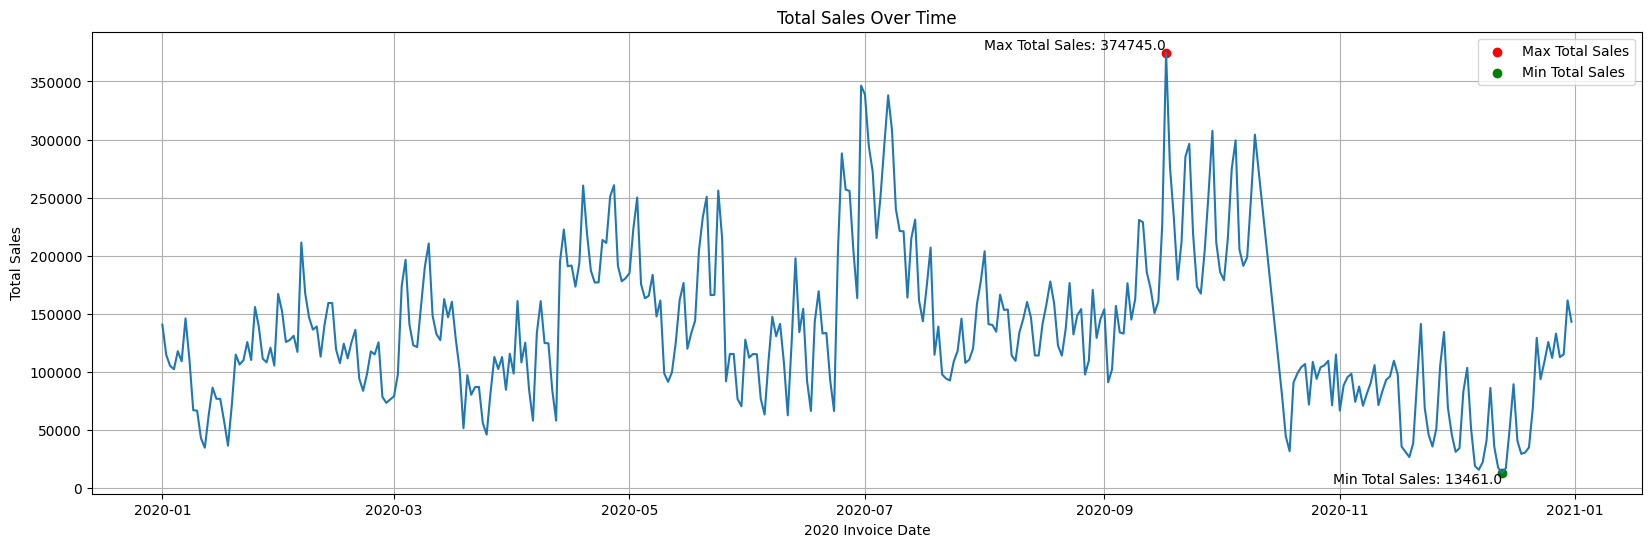

In [112]:
plt.figure(figsize=(20, 6))
plt.plot(df2020['Invoice Date'], df2020['Total Sales'], linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('2020 Invoice Date')
plt.ylabel('Total Sales')
plt.grid(True)

plt.scatter(max_units_date, df2020['Total Sales'].max(), color='red', label='Max Total Sales')
plt.text(max_units_date, df2020['Total Sales'].max(), f'Max Total Sales: {df2020["Total Sales"].max()}', ha='right', va='bottom')

plt.scatter(min_units_date, df2020['Total Sales'].min(), color='green', label='Min Total Sales')
plt.text(min_units_date, df2020['Total Sales'].min(), f'Min Total Sales: {df2020["Total Sales"].min()}', ha='right', va='top')

plt.legend()

plt.show()

## 2021년

In [113]:
df2021 = df[df['year']==2021]
df2021 = df2021.groupby('Invoice Date')['Total Sales'].mean().reset_index()
df2021

,Invoice Date,Total Sales
0,2021-01-01,130980.400000
1,2021-01-02,146122.800000
2,2021-01-03,60590.529412
3,2021-01-04,114414.800000
4,2021-01-05,78391.391304
...,...,...
360,2021-12-27,120470.400000
361,2021-12-28,60202.000000
362,2021-12-29,42221.800000
363,2021-12-30,33580.600000


- 2021년에 매출량이 가장 많았던 날과 가장 적었던 날 출력

In [114]:
max_units_date2021 = df2021.loc[df2021['Total Sales'].idxmax(), 'Invoice Date']
min_units_date2021 = df2021.loc[df2021['Total Sales'].idxmin(), 'Invoice Date']

print(max_units_date2021,df2021['Total Sales'].max())
print(min_units_date2021,df2021['Total Sales'].min())

2021-06-07 00:00:00 193092.5
2021-10-31 00:00:00 16522.2


- 2021년 매출량 변화

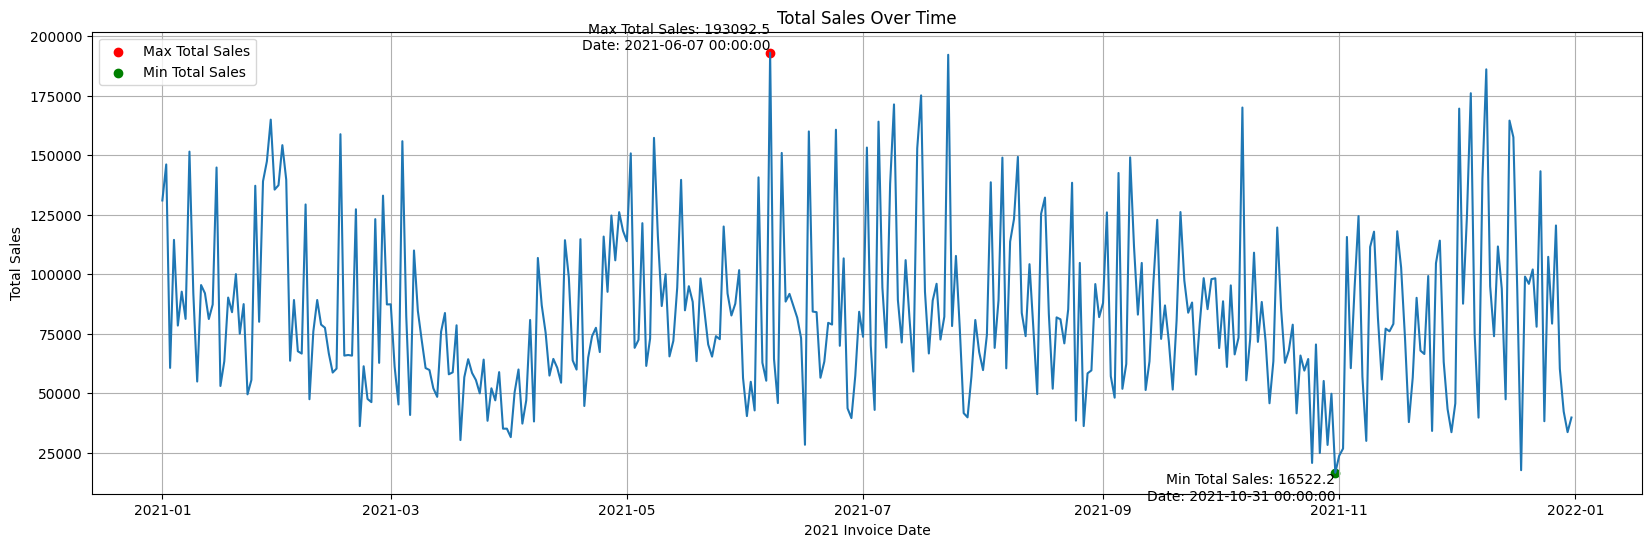

In [115]:
plt.figure(figsize=(20, 6))
plt.plot(df2021['Invoice Date'], df2021['Total Sales'], linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('2021 Invoice Date')
plt.ylabel('Total Sales')
plt.grid(True)

max_units_date = df2021.loc[df2021['Total Sales'].idxmax()]['Invoice Date']
min_units_date = df2021.loc[df2021['Total Sales'].idxmin()]['Invoice Date']

max_units_sold = df2021['Total Sales'].max()
min_units_sold = df2021['Total Sales'].min()

plt.scatter(max_units_date, max_units_sold, color='red', label='Max Total Sales')
plt.text(max_units_date, max_units_sold, f'Max Total Sales: {max_units_sold}\nDate: {max_units_date}', ha='right', va='bottom')

plt.scatter(min_units_date, min_units_sold, color='green', label='Min Total Sales')
plt.text(min_units_date, min_units_sold, f'Min Total Sales: {min_units_sold}\nDate: {min_units_date}', ha='right', va='top')

plt.legend()
plt.show()

## 2020, 2021년 매출 비교

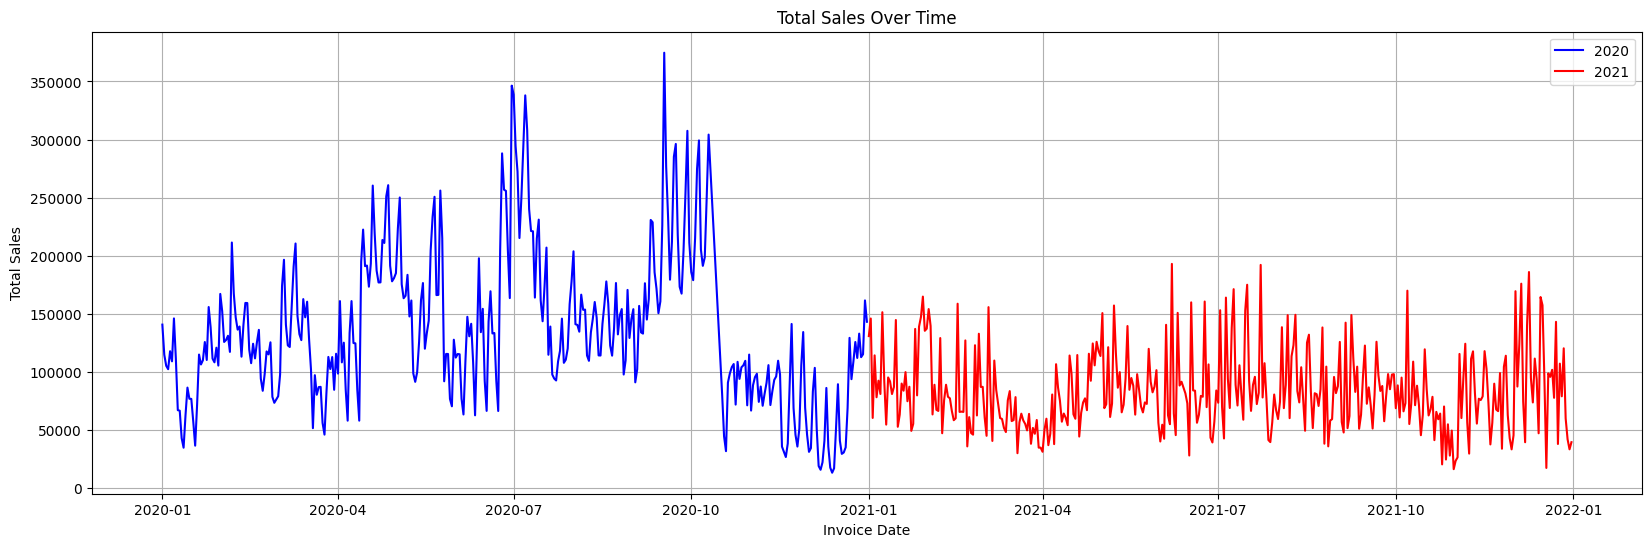

In [116]:
plt.figure(figsize=(20,6))
plt.plot(df2020['Invoice Date'],df2020['Total Sales'],linestyle='-',label='2020',color='blue')
plt.plot(df2021['Invoice Date'],df2021['Total Sales'],linestyle='-',label='2021',color='red')
plt.title('Total Sales Over Time')
plt.xlabel('Invoice Date')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

Text(0, 0.5, 'Average Total Sales')

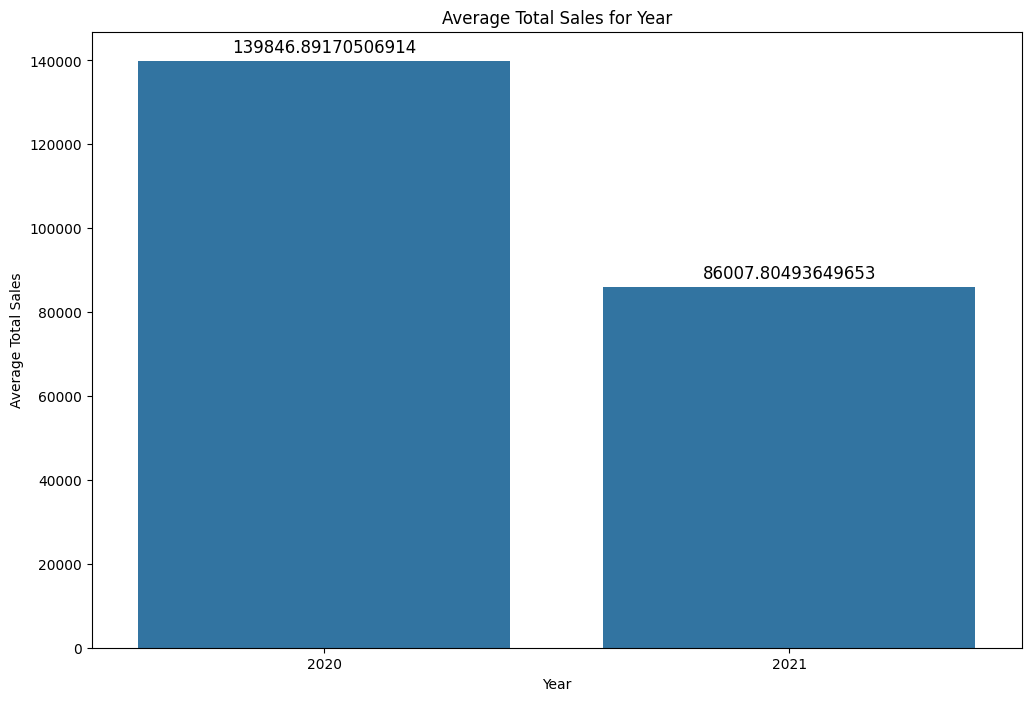

In [117]:
plt.figure(figsize=(12, 8))
year_operating = df.groupby(['year'])['Total Sales'].mean().reset_index()
ax = sns.barplot(data=year_operating, x='year', y='Total Sales', linewidth=2)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Average Total Sales for Year')
plt.xlabel('Year')
plt.ylabel('Average Total Sales')

# 2020, 2021년 월 별 매출량 비교
## 2020년

In [118]:
m2020 = df[df['year']==2020]
m2020 = m2020.groupby('month')['Total Sales'].mean().reset_index()
m2020

,month,Total Sales
0,1,108358.280000
1,2,131561.298246
2,3,134813.541985
3,4,189284.653846
4,5,178084.357895
5,6,147163.600000
6,7,164865.509615
7,8,143007.050360
8,9,190671.208333
9,10,126003.104651


In [119]:
max_units_month2020 = m2020.loc[m2020['Total Sales'].idxmax(), 'month']
min_units_month2020 = m2020.loc[m2020['Total Sales'].idxmin(), 'month']

print(max_units_month2020,m2020['Total Sales'].max())
print(min_units_month2020,m2020['Total Sales'].min())

9 190671.20833333334
11 82117.13333333333


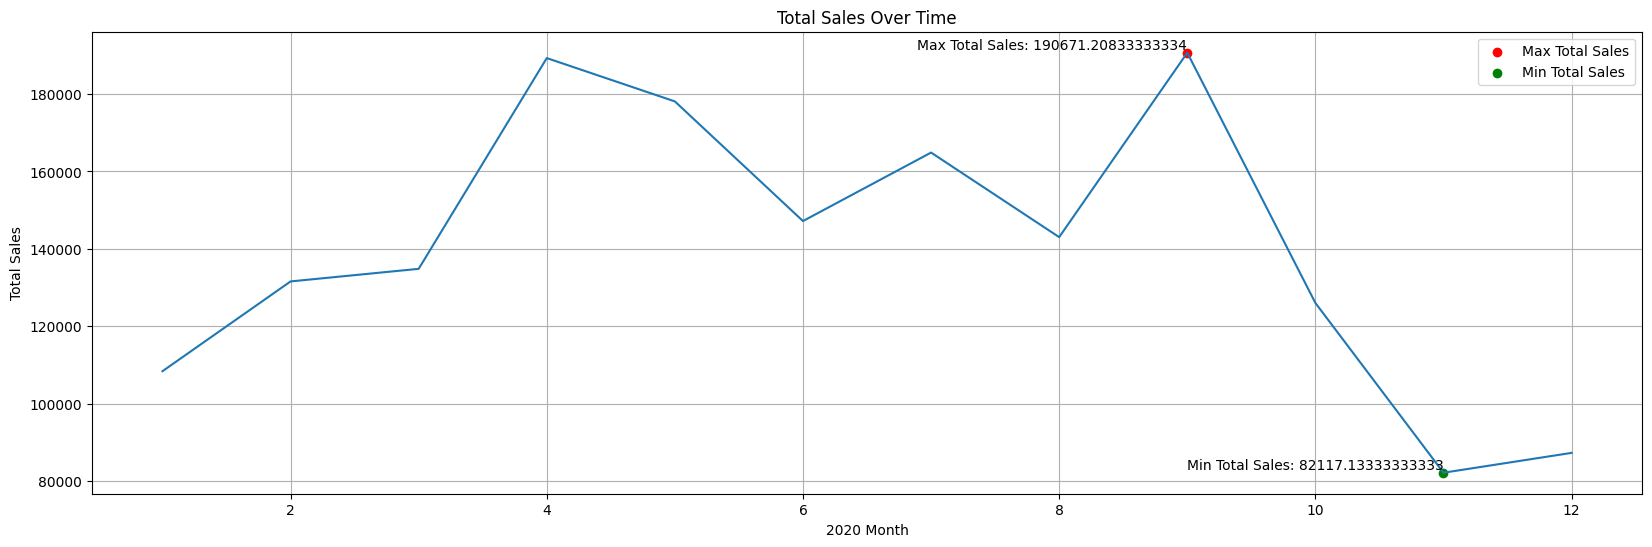

In [120]:
plt.figure(figsize=(20, 6))
plt.plot(m2020['month'], m2020['Total Sales'], linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('2020 Month')
plt.ylabel('Total Sales')
plt.grid(True)

plt.scatter(max_units_month2020, m2020['Total Sales'].max(), color='red', label='Max Total Sales')
plt.text(max_units_month2020, m2020['Total Sales'].max(), f'Max Total Sales: {m2020["Total Sales"].max()}', ha='right', va='bottom')
plt.scatter(min_units_month2020, m2020['Total Sales'].min(), color='green', label='Min Total Sales')
plt.text(min_units_month2020, m2020['Total Sales'].min(), f'Min Total Sales: {m2020["Total Sales"].min()}', ha='right', va='bottom')

plt.legend()

plt.show()

## 2021년

In [121]:
m2021 = df[df['year']==2021]
m2021 = m2021.groupby('month')['Total Sales'].mean().reset_index()
m2021

,month,Total Sales
0,1,77672.834037
1,2,69640.703927
2,3,58343.526080
3,4,67134.940928
4,5,87709.828966
5,6,98531.421525
6,7,116917.397015
7,8,101243.976190
8,9,81534.346154
9,10,72904.853022


In [122]:
max_units_month2021 = m2021.loc[m2021['Total Sales'].idxmax(), 'month']
min_units_month2021 = m2021.loc[m2021['Total Sales'].idxmin(), 'month']

print(max_units_month2021,m2021['Total Sales'].max())
print(min_units_month2021,m2021['Total Sales'].min())

7 116917.39701492537
3 58343.5260804769


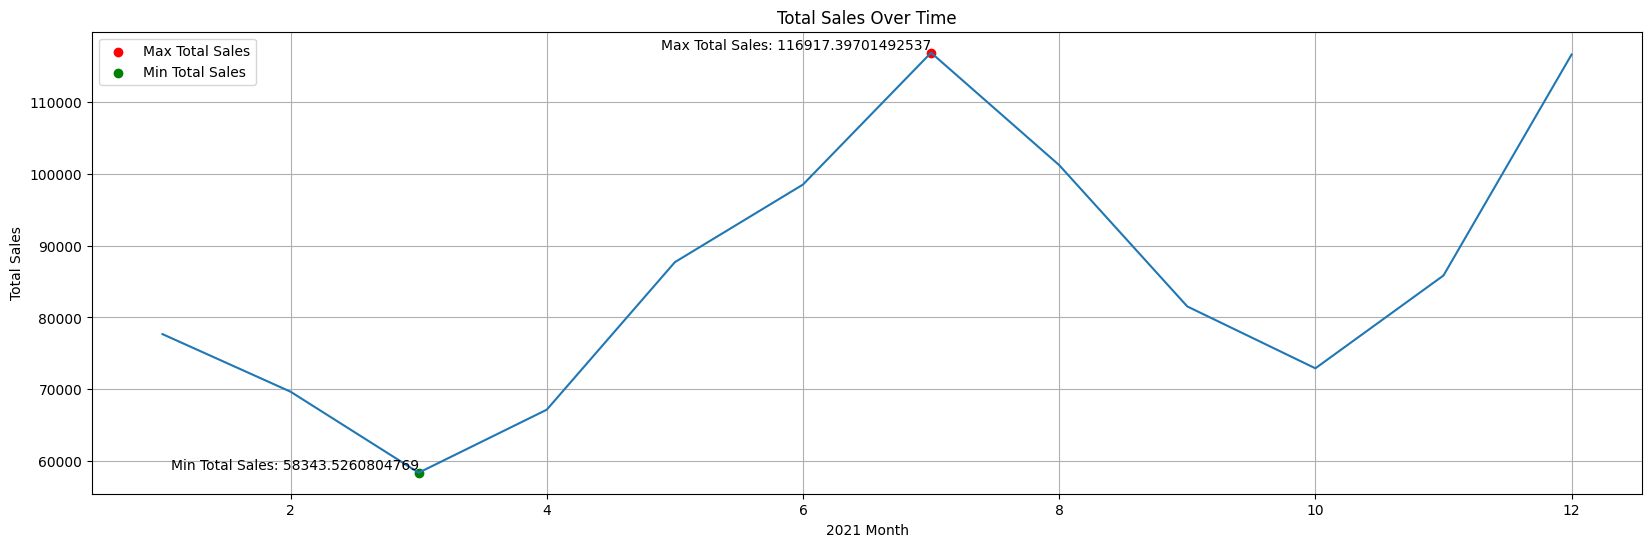

In [123]:
plt.figure(figsize=(20, 6))
plt.plot(m2021['month'], m2021['Total Sales'], linestyle='-')
plt.title('Total Sales Over Time')
plt.xlabel('2021 Month')
plt.ylabel('Total Sales')
plt.grid(True)

plt.scatter(max_units_month2021, m2021['Total Sales'].max(), color='red', label='Max Total Sales')
plt.text(max_units_month2021, m2021['Total Sales'].max(), f'Max Total Sales: {m2021["Total Sales"].max()}', ha='right', va='bottom')
plt.scatter(min_units_month2021, m2021['Total Sales'].min(), color='green', label='Min Total Sales')
plt.text(min_units_month2021, m2021['Total Sales'].min(), f'Min Total Sales: {m2021["Total Sales"].min()}', ha='right', va='bottom')

plt.legend()

plt.show()

## 2020&2021

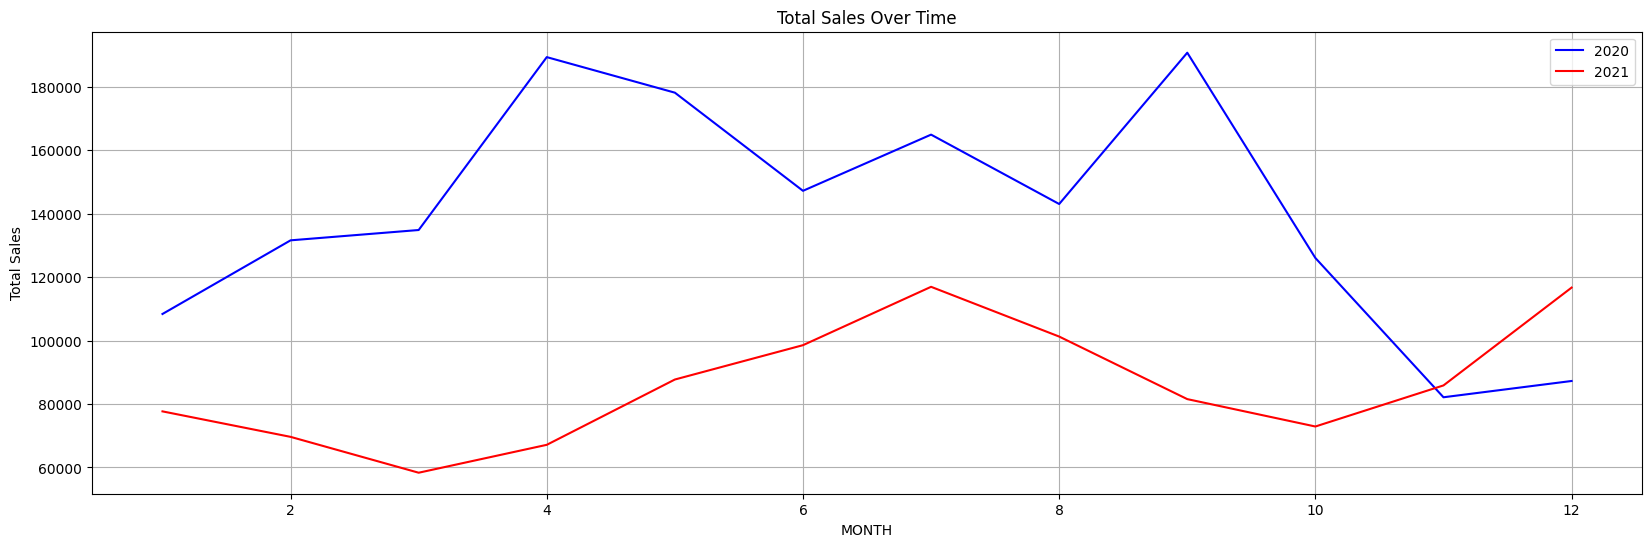

In [124]:
plt.figure(figsize=(20,6))
plt.plot(m2020['month'],m2020['Total Sales'],linestyle='-',label='2020',color='blue')
plt.plot(m2021['month'],m2021['Total Sales'],linestyle='-',label='2021',color='red')
plt.title('Total Sales Over Time')
plt.xlabel('MONTH')
plt.ylabel('Total Sales')
plt.grid(True)
plt.legend()
plt.show()

# 성별에 따른 비교
## 매출액 비교

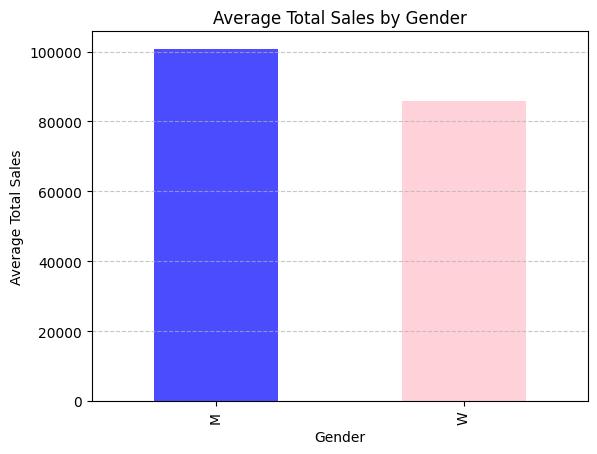

In [125]:
df['Gender'] = df['Product'].str.extract(r"(M|W)", expand=False)
gender01 = df.groupby('Gender')['Total Sales'].mean()
gender01.plot(kind='bar', color=['blue', 'pink'], alpha=0.7)
plt.title('Average Total Sales by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Total Sales')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2020년 월별 성별에 따른 매출액 비교

In [126]:
gender02 = df[['Total Sales','year','month','Gender']]
gender02

,Total Sales,year,month,Gender
0,600000,2020,1,M
1,500000,2020,1,M
2,400000,2020,1,W
3,382500,2020,1,W
4,540000,2020,1,M
...,...,...,...,...
9643,3200,2021,1,M
9644,4305,2021,1,W
9645,7544,2021,2,M
9646,2940,2021,2,M


In [127]:
filter1 = gender02['year']==2020
gender03 = gender02[filter1].groupby(['Gender','month'])['Total Sales'].mean().reset_index()
gender03

,Gender,month,Total Sales
0,M,1,117170.853333
1,M,2,144269.210526
2,M,3,139762.384615
3,M,4,199855.029851
4,M,5,189914.750000
5,M,6,140666.833333
6,M,7,175265.735849
7,M,8,150222.885714
8,M,9,200122.622222
9,M,10,122812.785714


Text(0, 0.5, 'Average Total Sales')

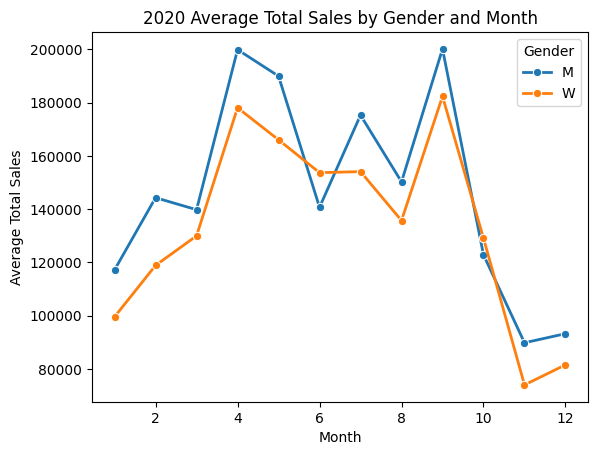

In [128]:
sns.lineplot(data=gender03, x='month', y='Total Sales', hue='Gender', marker='o', linestyle='-', linewidth=2)
plt.title('2020 Average Total Sales by Gender and Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')

## 2021년 월별 성별에 따른 매출액 비교

In [129]:
filter2 = gender02['year']==2021
gender04 = gender02[filter2].groupby(['Gender','month'])['Total Sales'].mean().reset_index()
gender04

,Gender,month,Total Sales
0,M,1,84457.775910
1,M,2,78622.527108
2,M,3,65117.960961
3,M,4,71354.336158
4,M,5,92758.843836
5,M,6,101075.925150
6,M,7,128295.453731
7,M,8,115336.128492
8,M,9,91888.424242
9,M,10,79146.154270


Text(0, 0.5, 'Average Total Sales')

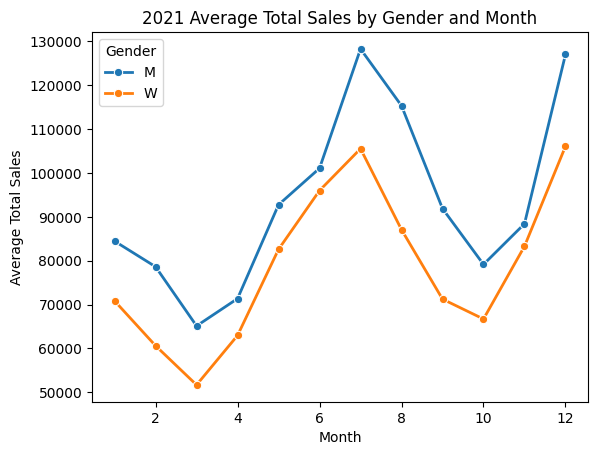

In [130]:
sns.lineplot(data=gender04, x='month', y='Total Sales', hue='Gender', marker='o', linestyle='-', linewidth=2)
plt.title('2021 Average Total Sales by Gender and Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')

## 2020$2021년 남, 녀 월별 평균 매출액 차이

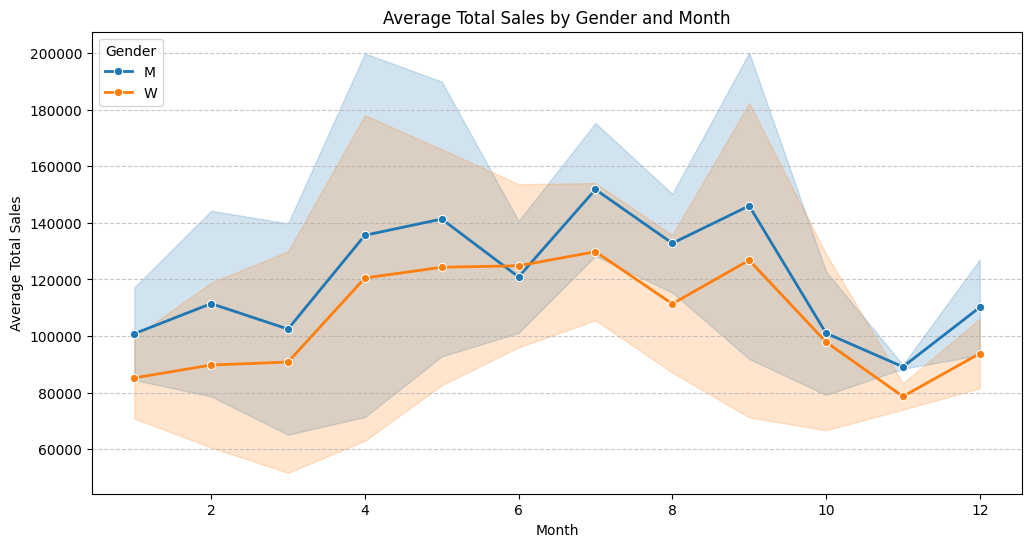

In [131]:
combined_data = pd.concat([gender03, gender04], keys=['2020', '2021'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='month', y='Total Sales', hue='Gender', marker='o', linestyle='-', linewidth=2)
plt.title('Average Total Sales by Gender and Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')

plt.legend(title='Gender', loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

## 2020&2021년 남성 평균 매출액

In [132]:
filter3 = gender02['Gender']=='M'
gender05 = gender02[filter3].groupby(['year','month'])['Total Sales'].mean().reset_index()
gender05

,year,month,Total Sales
0,2020,1,117170.853333
1,2020,2,144269.210526
2,2020,3,139762.384615
3,2020,4,199855.029851
4,2020,5,189914.750000
5,2020,6,140666.833333
6,2020,7,175265.735849
7,2020,8,150222.885714
8,2020,9,200122.622222
9,2020,10,122812.785714


Text(0, 0.5, 'Average Total Sales')

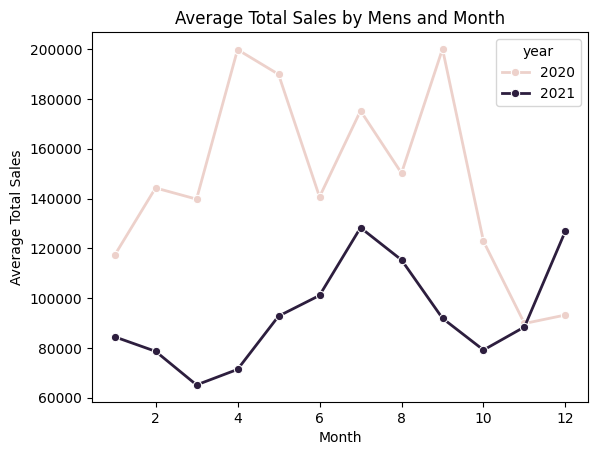

In [133]:
sns.lineplot(data=gender05, x='month', y='Total Sales', hue='year', marker='o', linestyle='-', linewidth=2)
plt.title('Average Total Sales by Mens and Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')

## 2020&2021년 여성 평균 매출액

Text(0, 0.5, 'Average Total Sales')

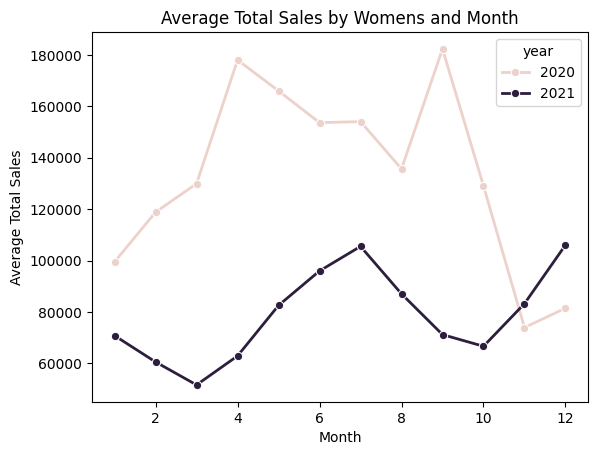

In [134]:
filter4 = gender02['Gender']=='W'
gender06 = gender02[filter4].groupby(['year','month'])['Total Sales'].mean().reset_index()
sns.lineplot(data=gender06, x='month', y='Total Sales', hue='year', marker='o', linestyle='-', linewidth=2)
plt.title('Average Total Sales by Womens and Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')

## 성별에 따른 2020&2021년 평균 매출량 비교

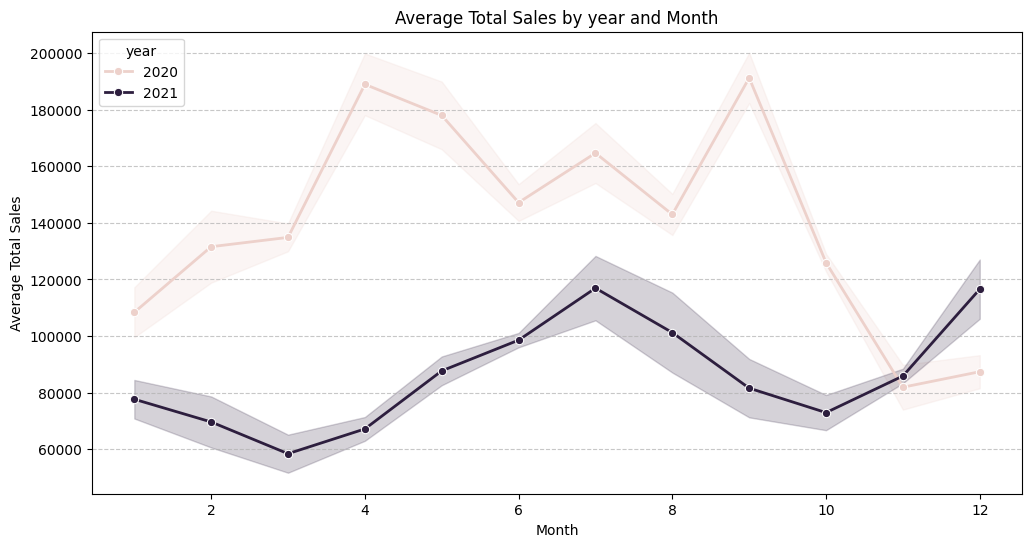

In [135]:
combined_data = pd.concat([gender05, gender06], keys=['Mens', 'Womens'])
plt.figure(figsize=(12, 6))
sns.lineplot(data=combined_data, x='month', y='Total Sales', hue='year', marker='o', linestyle='-', linewidth=2)
plt.title('Average Total Sales by year and Month')
plt.xlabel('Month')
plt.ylabel('Average Total Sales')

plt.legend(title='year', loc='upper left')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()

# 11월, 12월, 그 외 달 평균 매출 비교

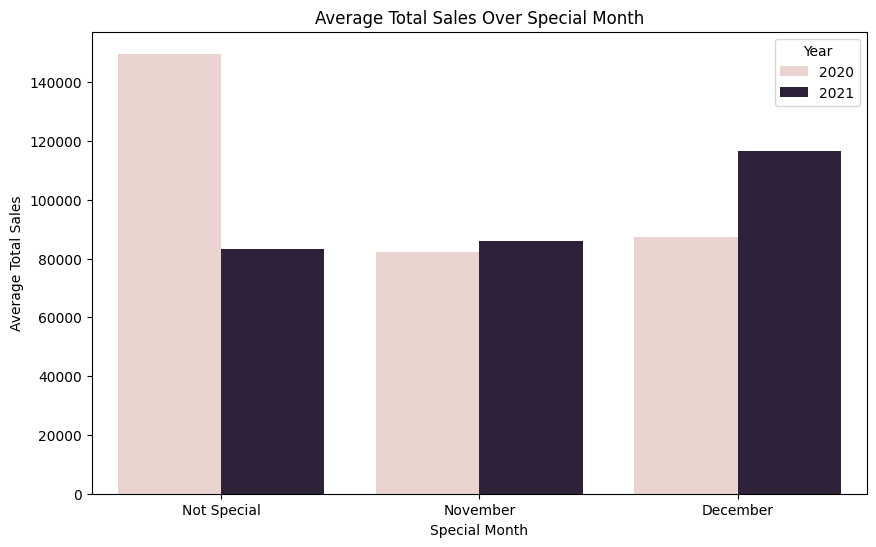

In [136]:
df['special'] = 0
df.loc[df['month']==11,'special'] = 1
df.loc[df['month']==12,'special'] = 2
df_special = df.groupby(['special','year'])['Total Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df_special, x='special', y='Total Sales', hue='year',linewidth=2)
plt.xticks(ticks=[0, 1, 2], labels=['Not Special', 'November', 'December'])
plt.title('Average Total Sales Over Special Month')
plt.xlabel('Special Month')
plt.ylabel('Average Total Sales')
plt.legend(title='Year')
plt.show()

## 11월에 많이 팔린 제품

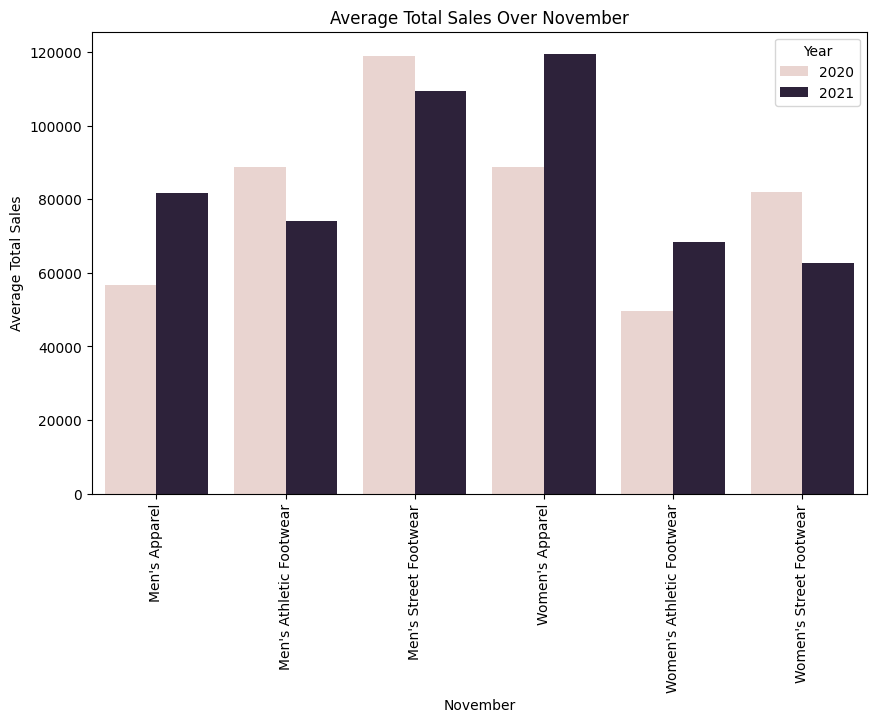

In [137]:
df11 = df[df['month']==11]
df11_1 = df11.groupby(['Product','year'])['Total Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df11_1, x='Product', y='Total Sales', hue='year',linewidth=2)

plt.xticks(rotation=90)
plt.title('Average Total Sales Over November')
plt.xlabel('November')
plt.ylabel('Average Total Sales')
plt.legend(title='Year')
plt.show()

## 12월에 많이 팔린 제품

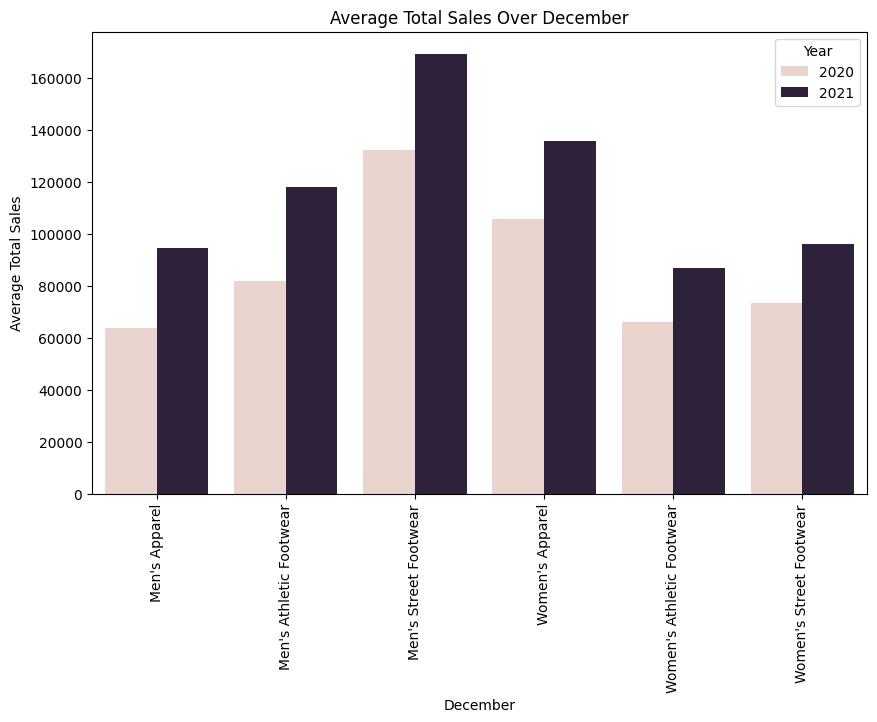

In [138]:
df12 = df[df['month']==12]
df12_1 = df12.groupby(['Product','year'])['Total Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df12_1, x='Product', y='Total Sales', hue='year',linewidth=2)

plt.xticks(rotation=90)
plt.title('Average Total Sales Over December')
plt.xlabel('December')
plt.ylabel('Average Total Sales')
plt.legend(title='Year')
plt.show()

## 그 외 달 많이 팔린 제품

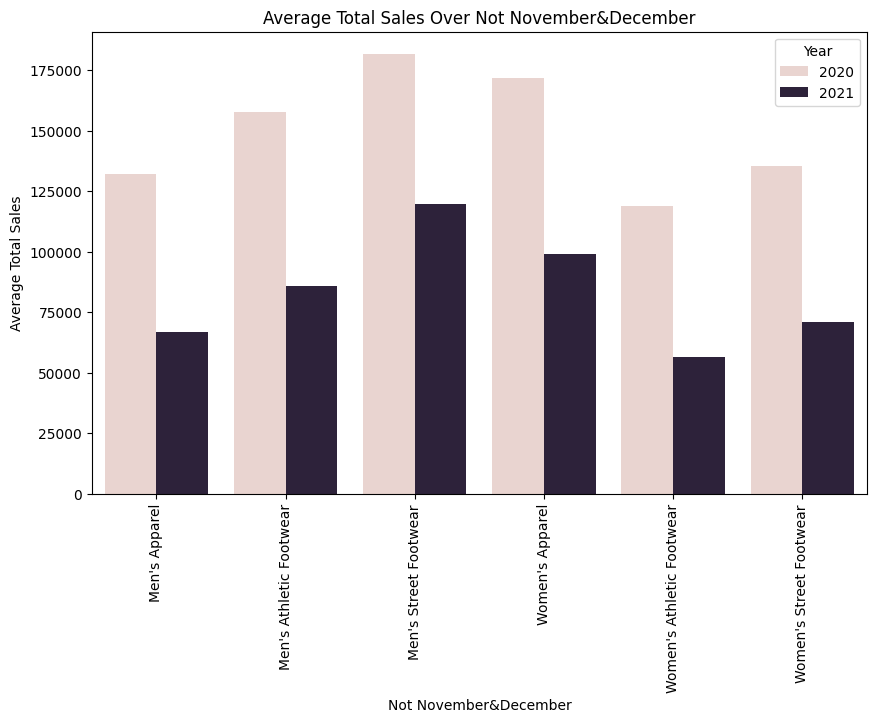

In [139]:
df0 = df[df['special']==0]

df0_1 = df0.groupby(['Product','year'])['Total Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df0_1, x='Product', y='Total Sales', hue='year',linewidth=2)

plt.xticks(rotation=90)
plt.title('Average Total Sales Over Not November&December')
plt.xlabel('Not November&December')
plt.ylabel('Average Total Sales')
plt.legend(title='Year')
plt.show()

## 전체

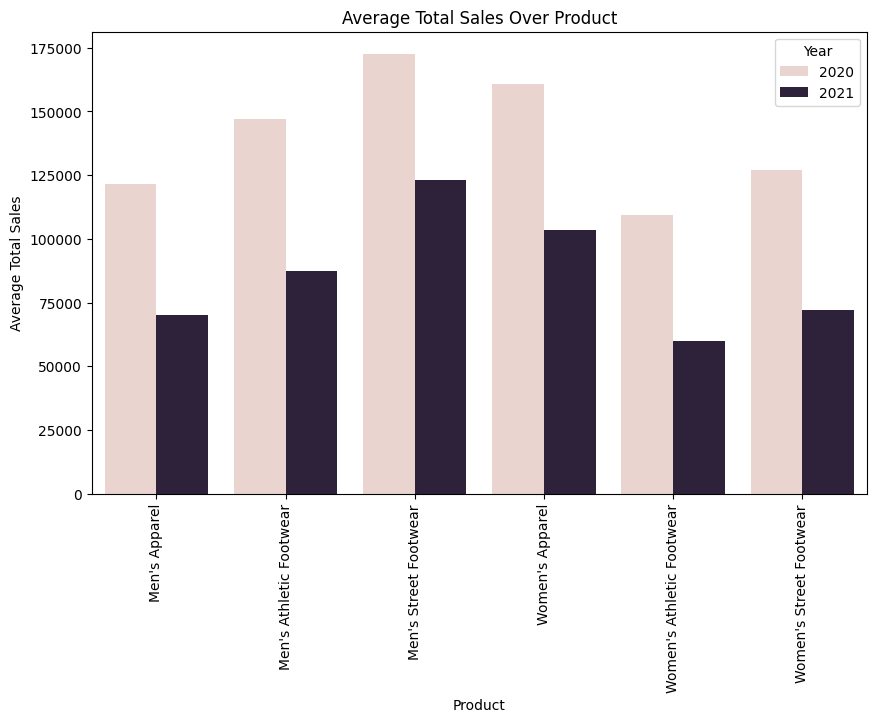

In [140]:
df5 = df.groupby(['Product','year'])['Total Sales'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df5, x='Product', y='Total Sales', hue='year',linewidth=2)

plt.xticks(rotation=90)
plt.title('Average Total Sales Over Product')
plt.xlabel('Product')
plt.ylabel('Average Total Sales')
plt.legend(title='Year')
plt.show()

# 매출이 많은 도시

/var/folders/zf/6h5l4dc57cj2qkp7wv1dz7zr0000gn/T/ipykernel_12839/933459025.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city, x='City_State', y='Total Sales', palette=colors)


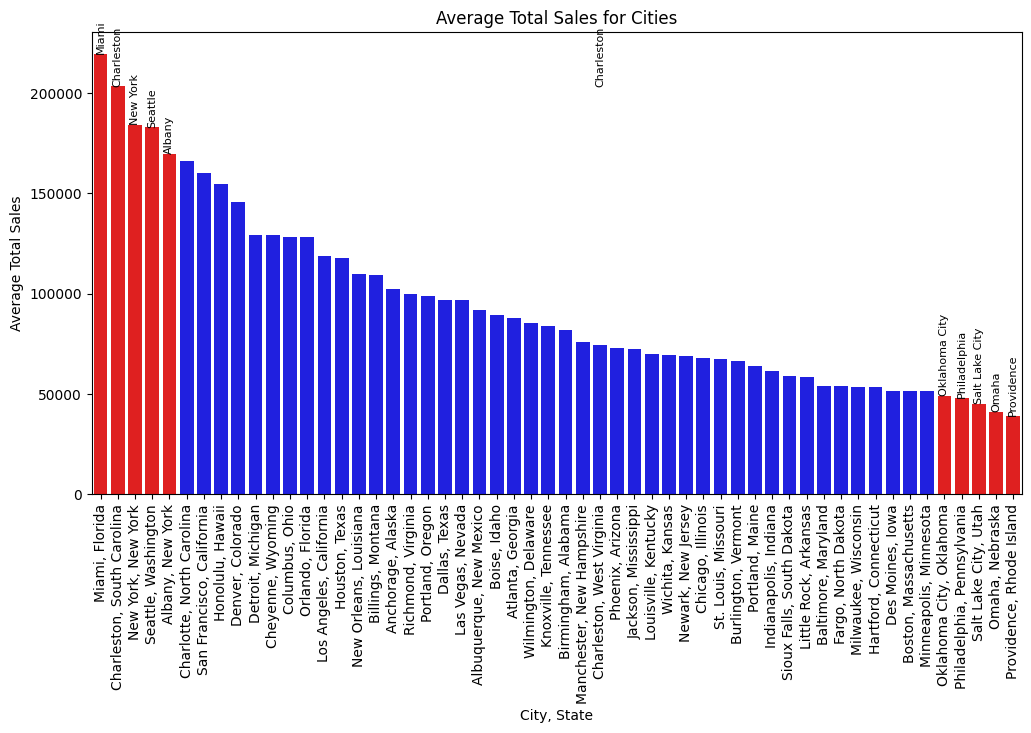

In [141]:
df_city = df.groupby(['City', 'State'])['Total Sales'].mean().sort_values(ascending=False).reset_index()

# 새로운 열 'City_State' 생성
df_city['City_State'] = df_city['City'] + ', ' + df_city['State']

plt.figure(figsize=(12, 6))
colors = ['red' if city_state in df_city.head(5)['City_State'].values or city_state in df_city.tail(5)['City_State'].values else 'blue' for city_state in df_city['City_State']]
sns.barplot(data=df_city, x='City_State', y='Total Sales', palette=colors)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Total Sales for Cities')
plt.xlabel('City, State')
plt.ylabel('Average Total Sales')

# 상위 5개와 하위 5개 도시에 대한 레이블 추가
for idx, city in enumerate(df_city['City']):
    if city in df_city.head(5)['City'].values or city in df_city.tail(5)['City'].values:
        plt.text(idx, df_city[df_city['City'] == city]['Total Sales'].values[0], city,
                 ha='center', va='bottom', rotation=90, color='black', fontsize=8)

plt.show()


In [142]:
df_city.head(5)['City_State']

0                Miami, Florida
1    Charleston, South Carolina
2            New York, New York
3           Seattle, Washington
4              Albany, New York
Name: City_State, dtype: object

In [143]:
df_city.tail(5)['City_State']

49       Oklahoma City, Oklahoma
50    Philadelphia, Pennsylvania
51          Salt Lake City, Utah
52               Omaha, Nebraska
53      Providence, Rhode Island
Name: City_State, dtype: object

/var/folders/zf/6h5l4dc57cj2qkp7wv1dz7zr0000gn/T/ipykernel_12839/2423888710.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=selected_cities, x='City', y='Total Sales', palette=colors)


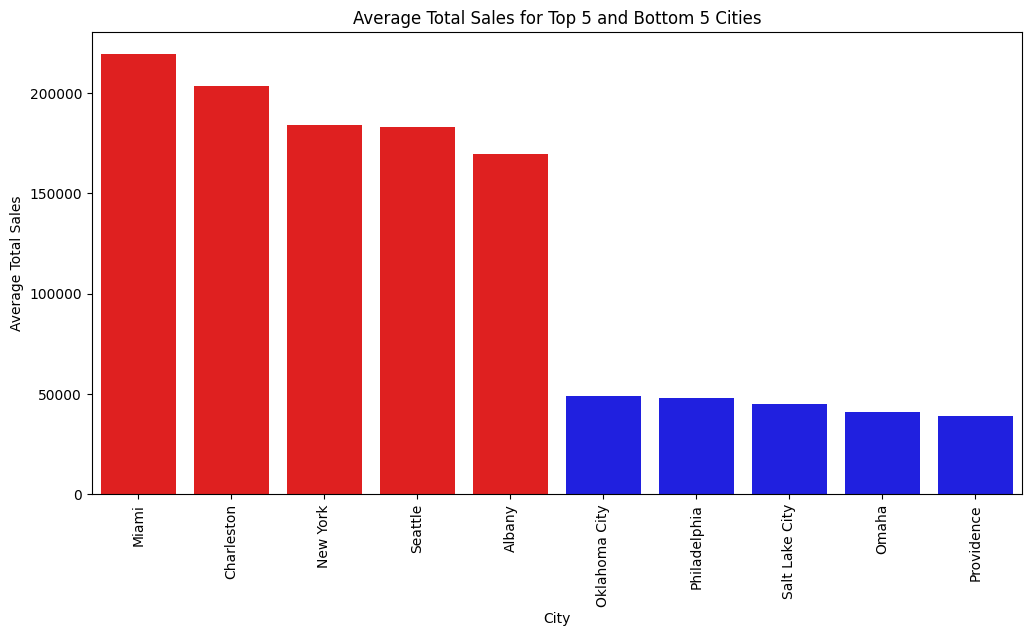

In [144]:
# 상위 5개 도시
top5_cities = df_city.head(5)

# 하위 5개 도시
bottom5_cities = df_city.tail(5)

# 상위 5개 도시와 하위 5개 도시를 합침
selected_cities = pd.concat([top5_cities, bottom5_cities])

# 색상 설정
colors = ['red' if city in top5_cities['City'].values else 'blue' for city in selected_cities['City']]

# 그래프 그리기
plt.figure(figsize=(12, 6))
sns.barplot(data=selected_cities, x='City', y='Total Sales', palette=colors)
plt.xticks(rotation=90)
plt.title('Average Total Sales for Top 5 and Bottom 5 Cities')
plt.xlabel('City')
plt.ylabel('Average Total Sales')
plt.show()

# 매출이 많은 주

/var/folders/zf/6h5l4dc57cj2qkp7wv1dz7zr0000gn/T/ipykernel_12839/3038504428.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_state, x='State', y='Total Sales', palette=colors)


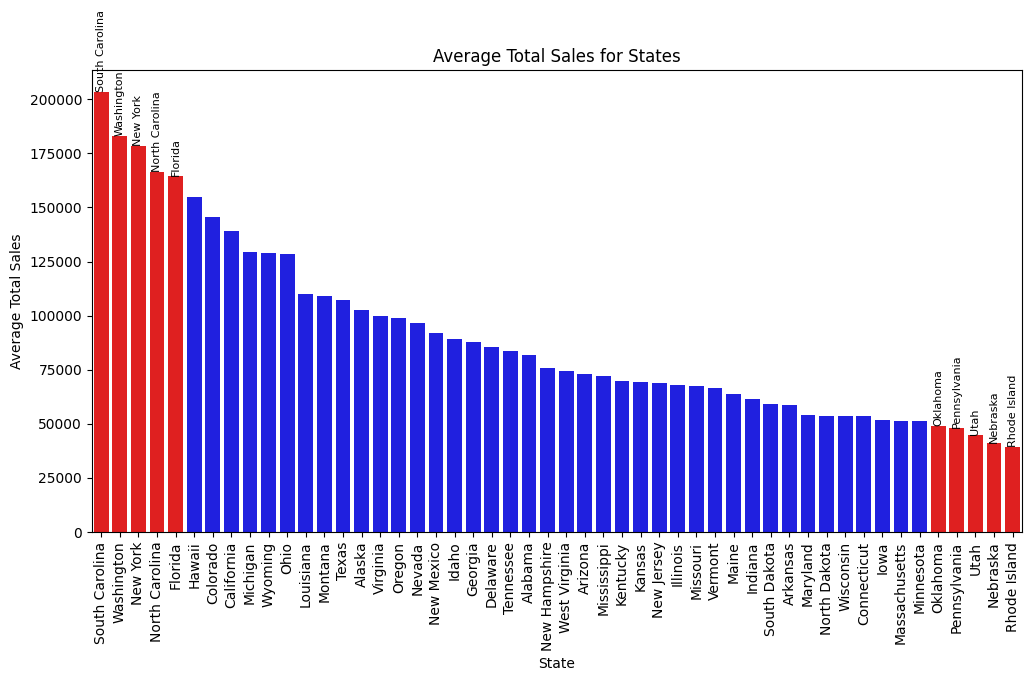

In [145]:
df_state = df.groupby(['State'])['Total Sales'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(12, 6))
colors = ['red' if state in df_state.head(5)['State'].values or state in df_state.tail(5)['State'].values else 'blue' for state in df_state['State']]
sns.barplot(data=df_state, x='State', y='Total Sales', palette=colors)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Total Sales for States')
plt.xlabel('State')
plt.ylabel('Average Total Sales')

# 상위 5개와 하위 5개 도시에 대한 레이블 추가
for idx, state in enumerate(df_state['State']):
    if state in df_state.head(5)['State'].values or state in df_state.tail(5)['State'].values:
        plt.text(idx, df_state[df_state['State'] == state]['Total Sales'].values[0], state,
                 ha='center', va='bottom', rotation=90, color='black', fontsize=8)

plt.show()

## 매출 상위 5위 안에 드는 주의 도시의 매출액

In [146]:
st = ['South Carolina','Washington','New York','North Carolina','Florida']
df_top = df[df['State'].isin(st)]
df_top['City'].unique()

array(['New York', 'Seattle', 'Miami', 'Orlando', 'Albany', 'Charleston',
       'Charlotte'], dtype=object)

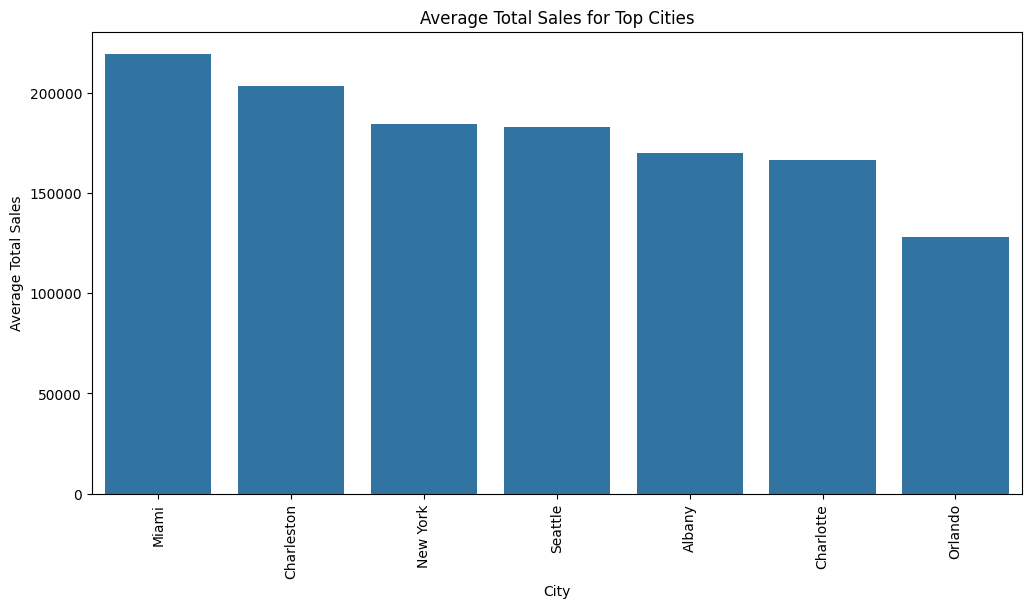

In [147]:
plt.figure(figsize=(12, 6))
df_top = df_top.groupby(['City'])['Total Sales'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=df_top, x='City', y='Total Sales')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Total Sales for Top Cities')
plt.xlabel('City')
plt.ylabel('Average Total Sales')
plt.show()

## 매출 하위 5위 안에 드는 주의 도시의 매출액

In [148]:
st = ['Oklahoma','Pennsylvania','Utah','Nebraska','Rhode Island']
df_bottom = df[df['State'].isin(st)]
df_bottom['City'].unique()

array(['Philadelphia', 'Omaha', 'Salt Lake City', 'Oklahoma City',
       'Providence'], dtype=object)

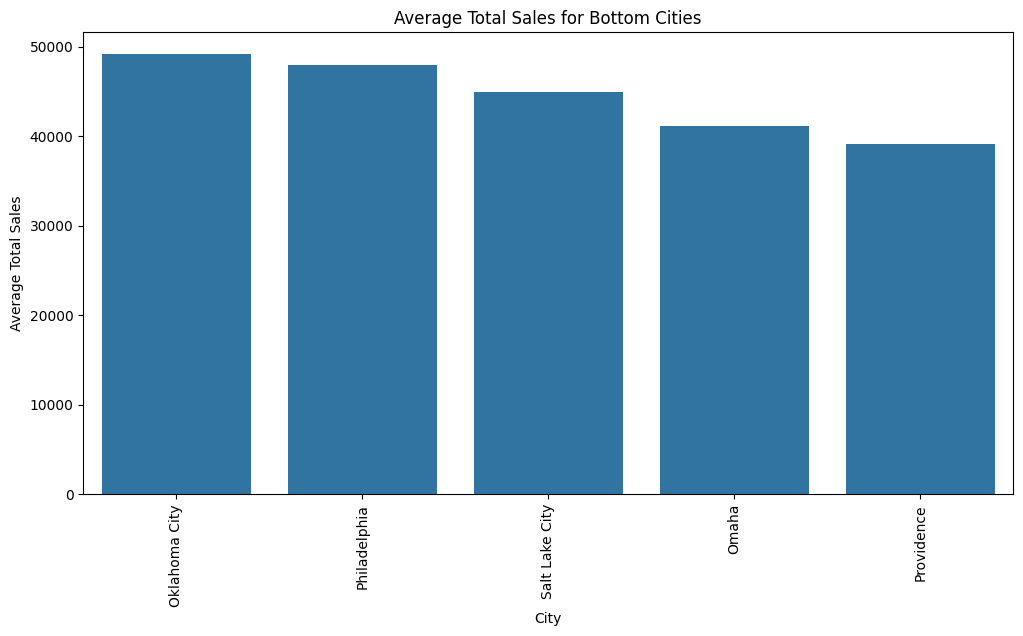

In [149]:
plt.figure(figsize=(12, 6))
df_bottom = df_bottom.groupby(['City'])['Total Sales'].mean().sort_values(ascending=False).reset_index()
sns.barplot(data=df_bottom, x='City', y='Total Sales')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Total Sales for Bottom Cities')
plt.xlabel('City')
plt.ylabel('Average Total Sales')
plt.show()

# 마진률 분석
## 2020&2021년 마진률 비교

Text(0, 0.5, 'Average Operating Margin')

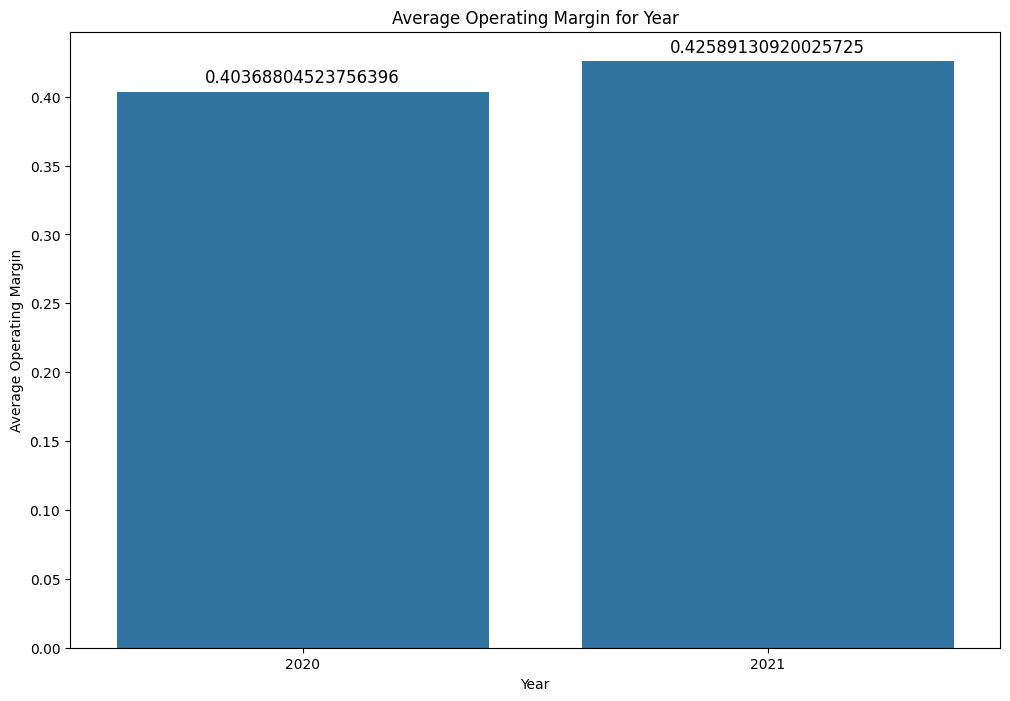

In [150]:
df2 = df.copy()
df2['Operating Margin'] = (df2['Operating Profit'] / df2['Total Sales'])

plt.figure(figsize=(12, 8))
year_operating = df2.groupby(['year'])['Operating Margin'].mean().reset_index()
ax = sns.barplot(data=year_operating, x='year', y='Operating Margin', linewidth=2)

for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', xytext=(0, 10), textcoords='offset points', fontsize=12)

plt.title('Average Operating Margin for Year')
plt.xlabel('Year')
plt.ylabel('Average Operating Margin')

## 월별 평균 마진률 분석

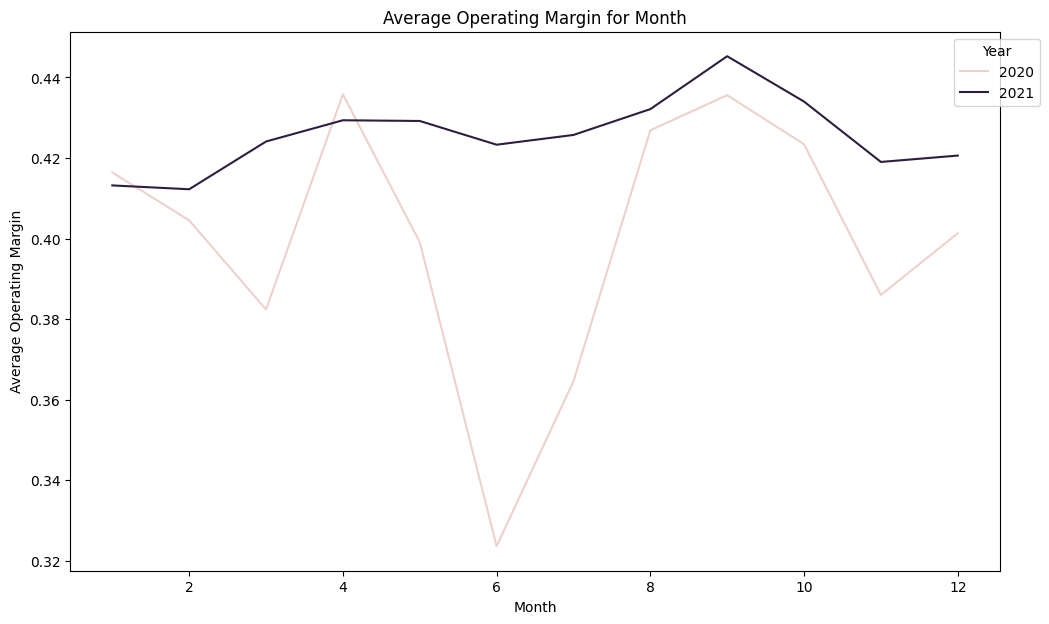

In [151]:
month_year_operating = df2.groupby(['month', 'year'])['Operating Margin'].mean().reset_index()

plt.figure(figsize=(12, 7))
ax = sns.lineplot(data=month_year_operating, x='month', y='Operating Margin', hue='year')

# 범례 위치 조절
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.title('Average Operating Margin for Month')
plt.xlabel('Month')
plt.ylabel('Average Operating Margin')
plt.show()

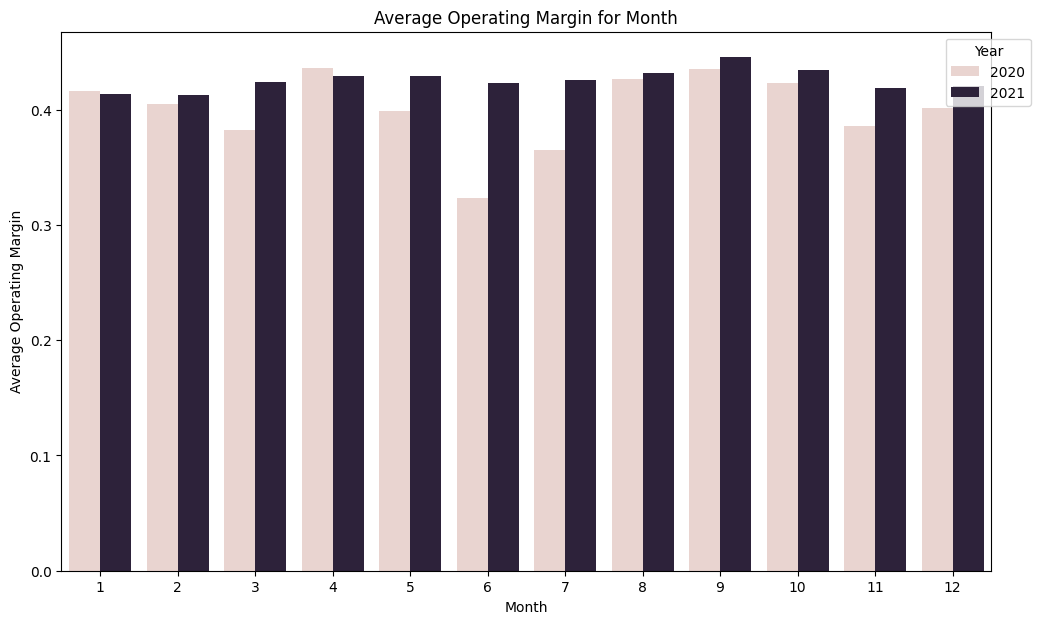

In [152]:
month_year_operating = df2.groupby(['month', 'year'])['Operating Margin'].mean().reset_index()

plt.figure(figsize=(12, 7))
ax = sns.barplot(data=month_year_operating, x='month', y='Operating Margin', hue='year')

# 범례 위치 조절
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper right')

plt.title('Average Operating Margin for Month')
plt.xlabel('Month')
plt.ylabel('Average Operating Margin')
plt.show()

## 11월, 12월, 그 외의 달 평균 마진률 분석

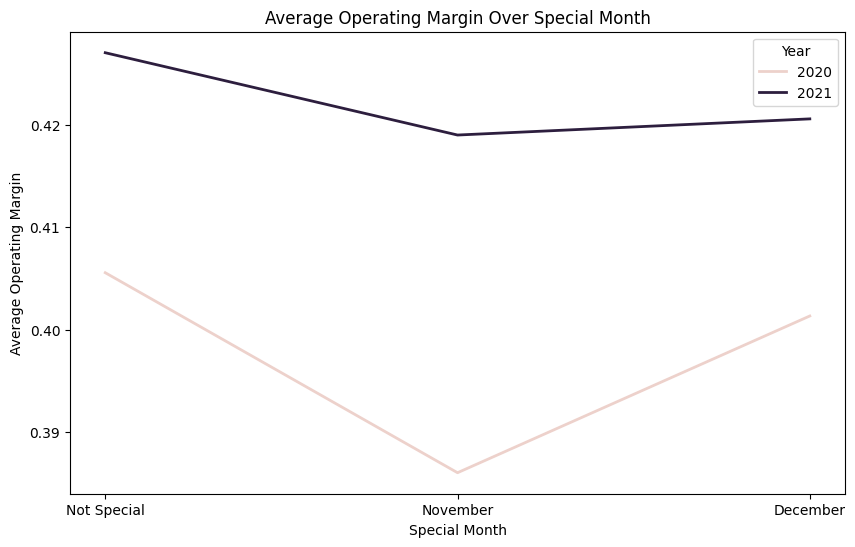

In [153]:
df2_special = df2.groupby(['special','year'])['Operating Margin'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=df2_special, x='special', y='Operating Margin', hue='year',linewidth=2)
plt.xticks(ticks=[0, 1, 2], labels=['Not Special', 'November', 'December'])
plt.title('Average Operating Margin Over Special Month')
plt.xlabel('Special Month')
plt.ylabel('Average Operating Margin')
plt.legend(title='Year')
plt.show()

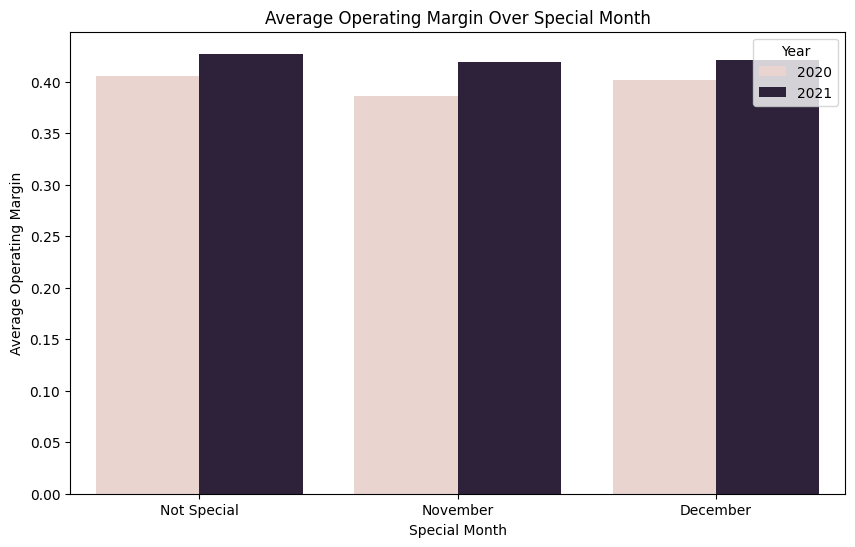

In [154]:
df2_special = df2.groupby(['special','year'])['Operating Margin'].mean().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=df2_special, x='special', y='Operating Margin', hue='year',linewidth=2)
plt.xticks(ticks=[0, 1, 2], labels=['Not Special', 'November', 'December'])
plt.title('Average Operating Margin Over Special Month')
plt.xlabel('Special Month')
plt.ylabel('Average Operating Margin')
plt.legend(title='Year')
plt.show()

## 제품별 마진률 분석

Text(0, 0.5, 'Average Operating Margin')

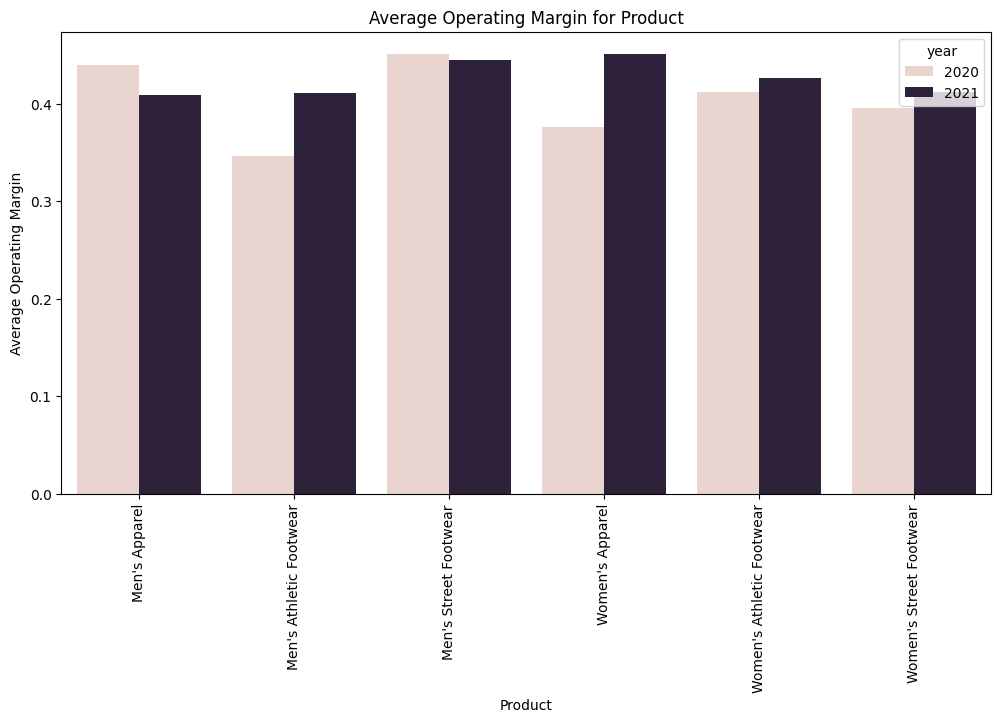

In [155]:
product_operating = df2.groupby(['Product','year'])['Operating Margin'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=product_operating, x='Product', y='Operating Margin',hue='year')
plt.title('Average Operating Margin for Product')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Average Operating Margin')

## 11월 제품별 마진률 분석

Text(0, 0.5, 'November Average Operating Margin')

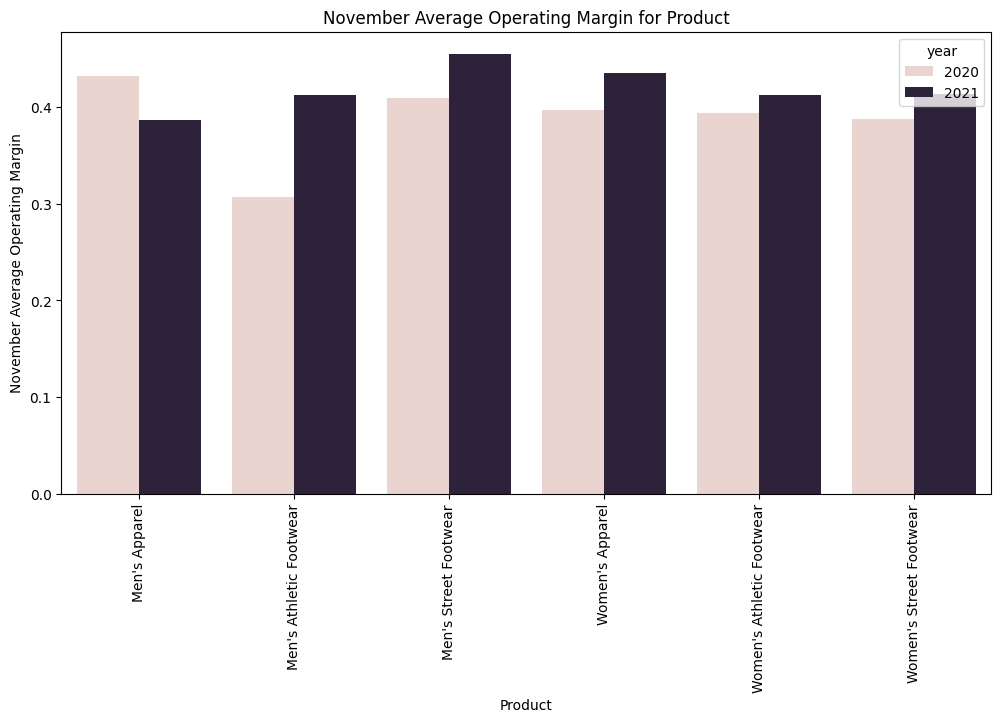

In [156]:
product_operating_11 = df2[df2['month']==11]
product_operating_11 = product_operating_11.groupby(['Product','year'])['Operating Margin'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=product_operating_11, x='Product', y='Operating Margin',hue='year')
plt.title('November Average Operating Margin for Product')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('November Average Operating Margin')

## 12월 제품별 마진률 분석

Text(0, 0.5, 'December Average Operating Margin')

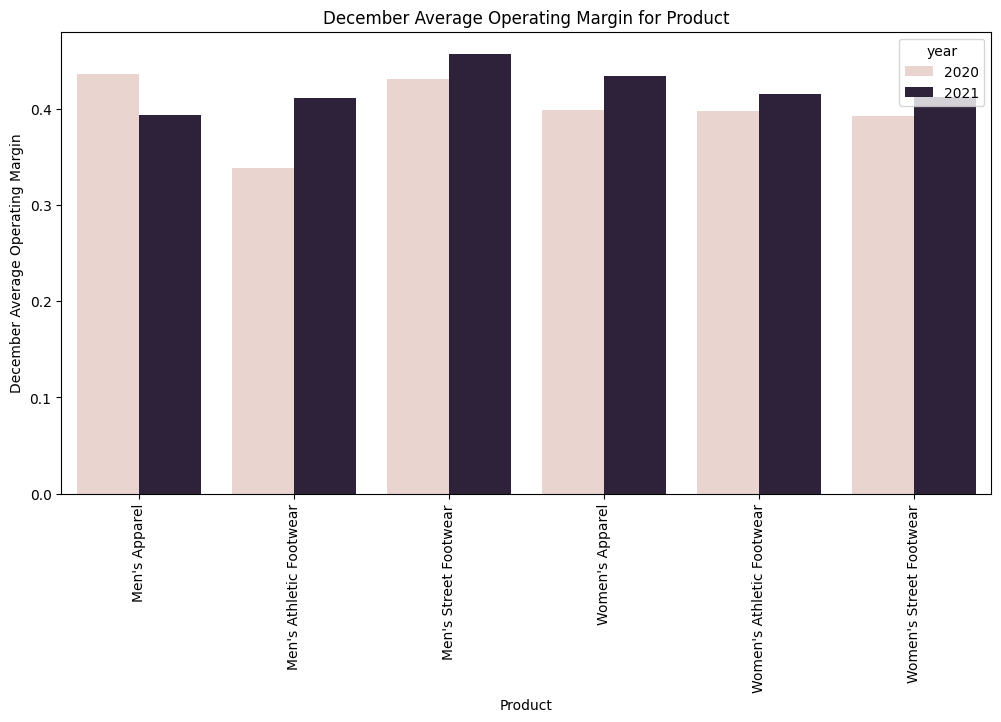

In [157]:
product_operating_12 = df2[df2['month']==12]
product_operating_12 = product_operating_12.groupby(['Product','year'])['Operating Margin'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=product_operating_12, x='Product', y='Operating Margin',hue='year')
plt.title('December Average Operating Margin for Product')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('December Average Operating Margin')

## 그 외의 달 제품별 마진률 분석

Text(0, 0.5, 'Not November&December Average Operating Margin')

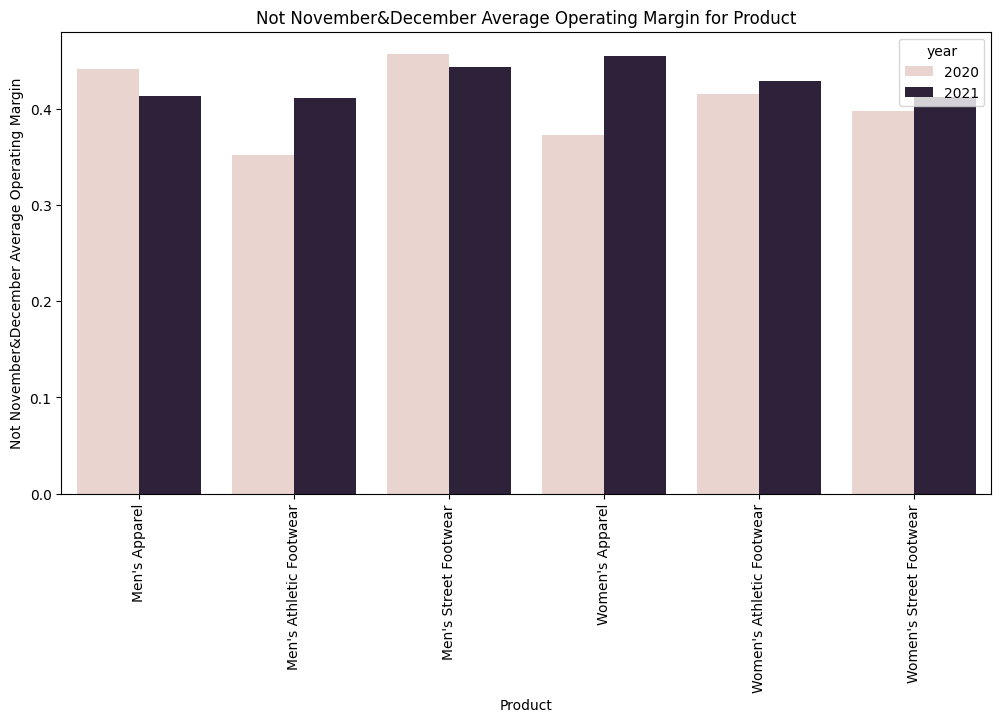

In [158]:
product_operating_1 = df2[~((df2['month']==11)|(df2['month']==12))]
product_operating_1 = product_operating_1.groupby(['Product','year'])['Operating Margin'].mean().reset_index()
plt.figure(figsize=(12, 6))
sns.barplot(data=product_operating_1, x='Product', y='Operating Margin',hue='year')
plt.title('Not November&December Average Operating Margin for Product')
plt.xticks(rotation=90)
plt.xlabel('Product')
plt.ylabel('Not November&December Average Operating Margin')

# 마진률이 높은 주

/var/folders/zf/6h5l4dc57cj2qkp7wv1dz7zr0000gn/T/ipykernel_12839/1708329688.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=state_operating, x='State', y='Operating Margin', palette=colors)


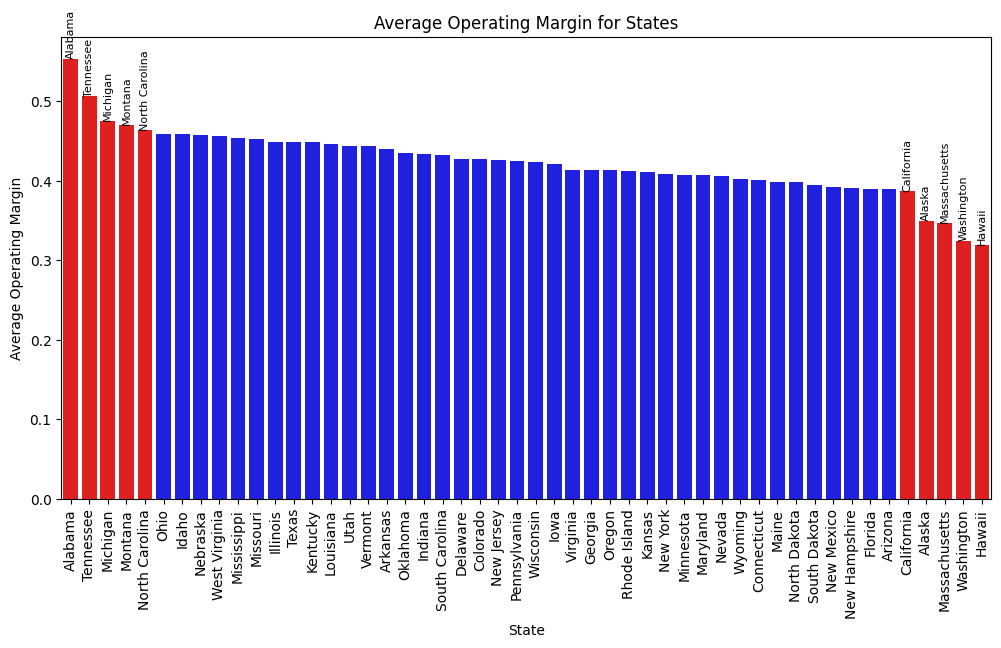

In [159]:
state_operating = df2.groupby(['State'])['Operating Margin'].mean().sort_values(ascending=False).reset_index()

plt.figure(figsize=(12, 6))
colors = ['red' if state in state_operating.head(5)['State'].values or state in state_operating.tail(5)['State'].values else 'blue' for state in state_operating['State']]
sns.barplot(data=state_operating, x='State', y='Operating Margin', palette=colors)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Operating Margin for States')
plt.xlabel('State')
plt.ylabel('Average Operating Margin')

# 상위 5개와 하위 5개 도시에 대한 레이블 추가
for idx, state in enumerate(state_operating['State']):
    if state in state_operating.head(5)['State'].values or state in state_operating.tail(5)['State'].values:
        plt.text(idx, state_operating[state_operating['State'] == state]['Operating Margin'].values[0], state,
                 ha='center', va='bottom', rotation=90, color='black', fontsize=8)

plt.show()

## 마진률이 높은 주에 해당 하는 도시와 낮은 주에 해당하는 도시의 마진률 비교

In [160]:
st_op = ['Alabama','Tennessee','Michigan','Montana','North Carolina']
st_bot = ['California','Alaska','Massachusetts','Washington','Hawaii']
operating_state_top = df2[df2['State'].isin(st_op)]
operating_state_bottom = df2[df2['State'].isin(st_bot)]

print(operating_state_top['City'].unique())
print(operating_state_bottom['City'].unique())

['Billings' 'Knoxville' 'Birmingham' 'Detroit' 'Charlotte']
['San Francisco' 'Los Angeles' 'Seattle' 'Anchorage' 'Honolulu' 'Boston']


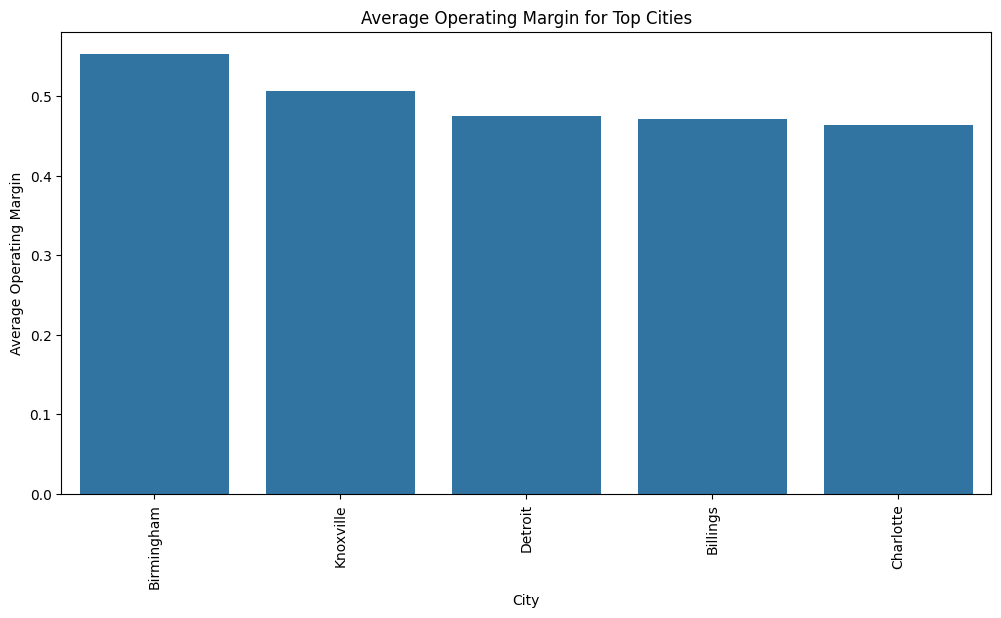

In [161]:
operating_state_top2 = operating_state_top[['City', 'Operating Margin']].groupby('City').mean().reset_index()
operating_state_top2 = operating_state_top2.sort_values(by='Operating Margin', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=operating_state_top2, x='City', y='Operating Margin')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Operating Margin for Top Cities')
plt.xlabel('City')
plt.ylabel('Average Operating Margin')
plt.show()

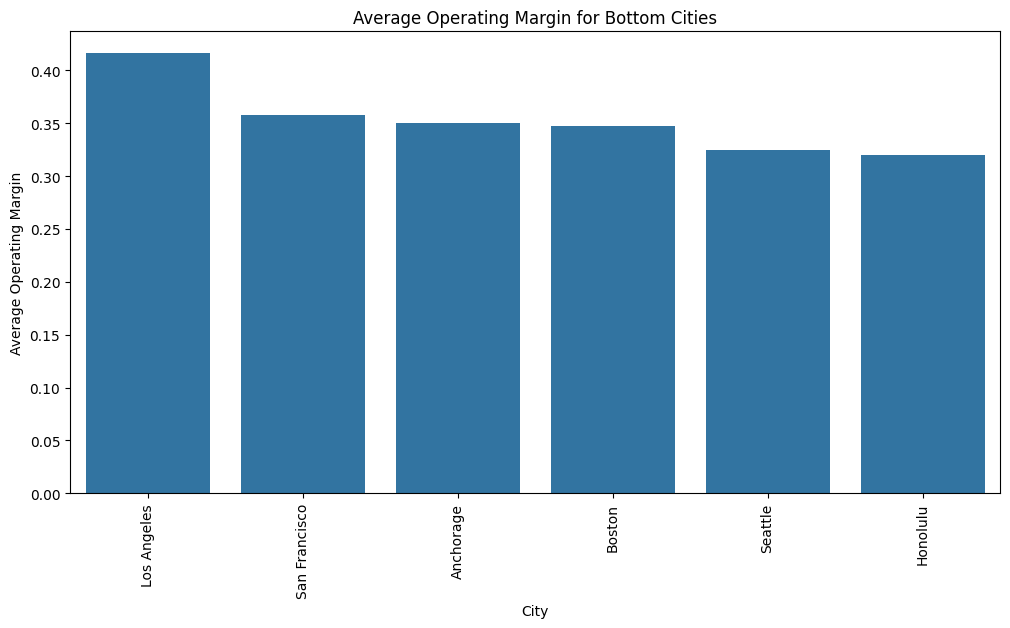

In [162]:
operating_state_bottom2 = operating_state_bottom[['City', 'Operating Margin']].groupby('City').mean().reset_index()
operating_state_bottom2 = operating_state_bottom2.sort_values(by='Operating Margin', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=operating_state_bottom2, x='City', y='Operating Margin')
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Operating Margin for Bottom Cities')
plt.xlabel('City')
plt.ylabel('Average Operating Margin')
plt.show()

# 마진률이 높은 도시

/var/folders/zf/6h5l4dc57cj2qkp7wv1dz7zr0000gn/T/ipykernel_12839/3710239340.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_city, x='City_State', y='Operating Margin', palette=colors)


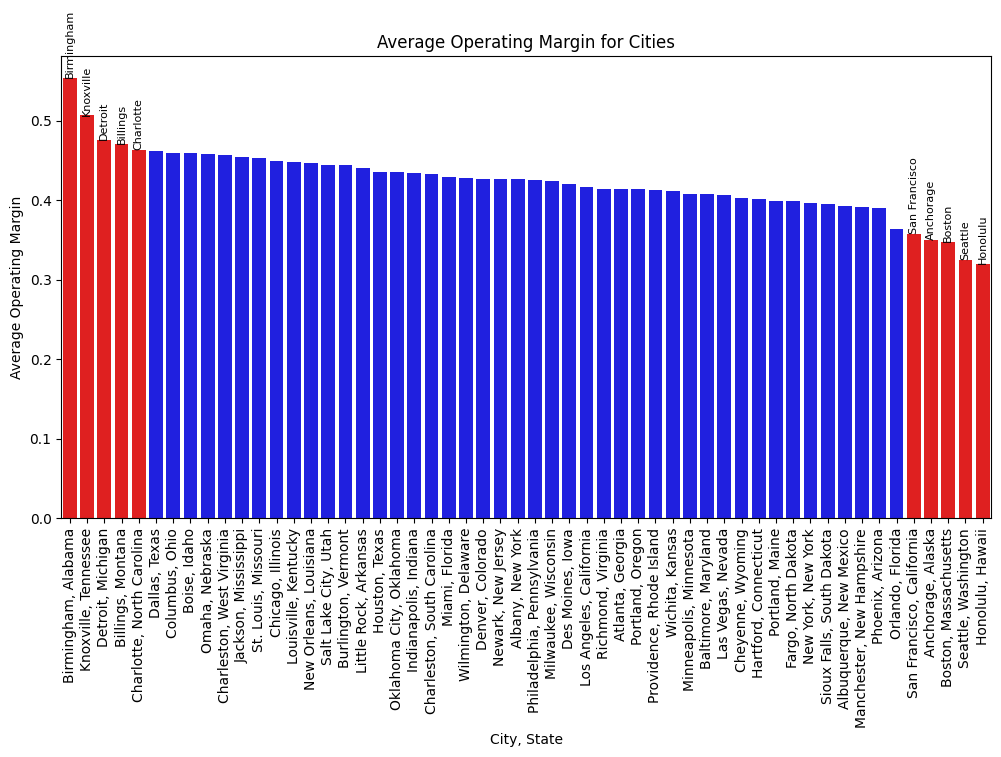

In [163]:
df_city = df2.groupby(['City', 'State'])['Operating Margin'].mean().sort_values(ascending=False).reset_index()

# 새로운 열 'City_State' 생성
df_city['City_State'] = df_city['City'] + ', ' + df_city['State']

plt.figure(figsize=(12, 6))
colors = ['red' if city_state in df_city.head(5)['City_State'].values or city_state in df_city.tail(5)['City_State'].values else 'blue' for city_state in df_city['City_State']]
sns.barplot(data=df_city, x='City_State', y='Operating Margin', palette=colors)
plt.xticks(rotation=90)
plt.tick_params(axis='x', labelsize=10)
plt.title('Average Operating Margin for Cities')
plt.xlabel('City, State')
plt.ylabel('Average Operating Margin')

# 상위 5개와 하위 5개 도시에 대한 레이블 추가
for idx, city in enumerate(df_city['City']):
    if city in df_city.head(5)['City'].values or city in df_city.tail(5)['City'].values:
        plt.text(idx, df_city[df_city['City'] == city]['Operating Margin'].values[0], city,
                 ha='center', va='bottom', rotation=90, color='black', fontsize=8)

plt.show()


# Retail 시장 점유율

In [ ]:

filter1 = df['year']==2020
filter2 = df['year']==2021


Text(0, 0.5, '')

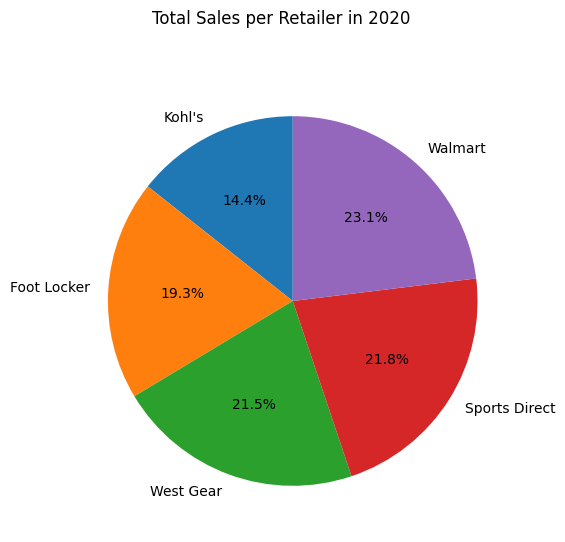

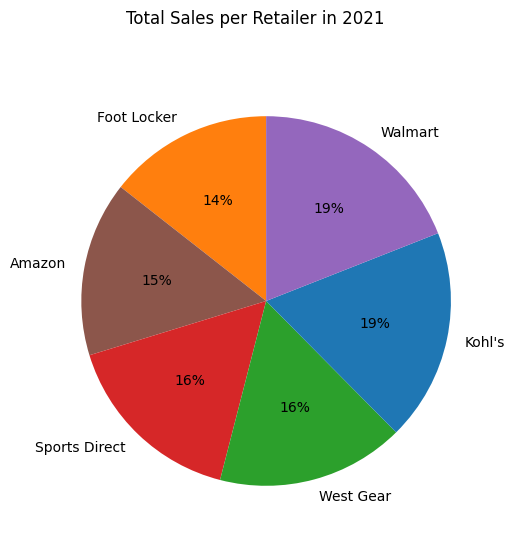

In [252]:
# Retailer Market share
market_share2020 = df[filter1][['Retailer',"Total Sales"]].groupby('Retailer').mean().sort_values("Total Sales")
market_share2021 = df[filter2][['Retailer',"Total Sales"]].groupby('Retailer').mean().sort_values("Total Sales")

color = sns.color_palette('tab10',6)
fixed_color2020 = [color[0],color[1],color[2],color[3],color[4]]
fixed_color2021 = [color[1],color[5],color[3],color[2],color[0],color[4]]

market_share2020.plot(kind='pie',subplots=True,figsize = (9,6),title="Total Sales per Retailer in 2020",autopct = '%1.1f%%',startangle=90,legend=False,colors=fixed_color2020)
plt.ylabel("")
market_share2021.plot(kind='pie',subplots=True,figsize = (9,6),title="Total Sales per Retailer in 2021",autopct = '%1.0f%%',startangle=90,legend=False,colors=fixed_color2021)
plt.ylabel("")

In [167]:
a = df[filter1].groupby(['Retailer',"Sales Method"])['month'].count()
b = df[filter1].groupby("Retailer")['month'].count()
ratio = a/b
retailer_name=ratio.index.to_list()
ratio_list = ratio.to_list()
s20=[]
l20=[]
o20=[]
for i,(retail,method) in enumerate(retailer_name):
    print(retail,method,ratio_list[i])
    if method == 'In-store':
        s20.append(ratio_list[i])
    elif method == 'Outlet':
        l20.append(ratio_list[i])
    else:
        o20.append(ratio_list[i])
s20.insert(1,0)
s20.insert(3,0)
x20=pd.DataFrame({"Retailer":b.index,
             'In-store':s20,
             'Outlet':l20,
             'Online':o20})

Foot Locker In-store 0.18694362017804153
Foot Locker Online 0.43026706231454004
Foot Locker Outlet 0.3827893175074184
Kohl's Online 0.5
Kohl's Outlet 0.5
Sports Direct In-store 0.18867924528301888
Sports Direct Online 0.39622641509433965
Sports Direct Outlet 0.41509433962264153
Walmart Online 0.3333333333333333
Walmart Outlet 0.6666666666666666
West Gear In-store 0.32125984251968503
West Gear Online 0.4204724409448819
West Gear Outlet 0.25826771653543307


In [168]:
a = df[filter2].groupby(['Retailer',"Sales Method"])['month'].count()
b = df[filter2].groupby("Retailer")['month'].count()
ratio = a/b
retailer_name=ratio.index.to_list()
ratio_list = ratio.to_list()
s21=[]
l21=[]
o21=[]
for i,(retail,method) in enumerate(retailer_name):
    print(retail,method,ratio_list[i])
    if method == 'In-store':
        s21.append(ratio_list[i])
    elif method == 'Outlet':
        l21.append(ratio_list[i])
    else:
        o21.append(ratio_list[i])
#s20.insert(1,0)
#s20.insert(3,0)
x21=pd.DataFrame({"Retailer":b.index,
             'In-store':s21,
             'Outlet':l21,
             'Online':o21})

Amazon In-store 0.12434141201264488
Amazon Online 0.5690200210748156
Amazon Outlet 0.3066385669125395
Foot Locker In-store 0.16782608695652174
Foot Locker Online 0.5434782608695652
Foot Locker Outlet 0.288695652173913
Kohl's In-store 0.14090019569471623
Kohl's Online 0.5596868884540117
Kohl's Outlet 0.299412915851272
Sports Direct In-store 0.14174454828660435
Sports Direct Online 0.4948078920041537
Sports Direct Outlet 0.363447559709242
Walmart In-store 0.09024390243902439
Walmart Online 0.526829268292683
Walmart Outlet 0.3829268292682927
West Gear In-store 0.28464634847613574
West Gear Online 0.4761357101782634
West Gear Outlet 0.23921794134560093


<Axes: title={'center': 'Sales methods ratio by Retailer in 2021'}, xlabel='Retailer'>

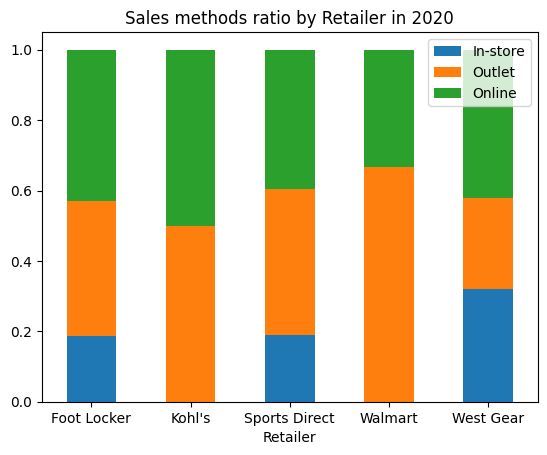

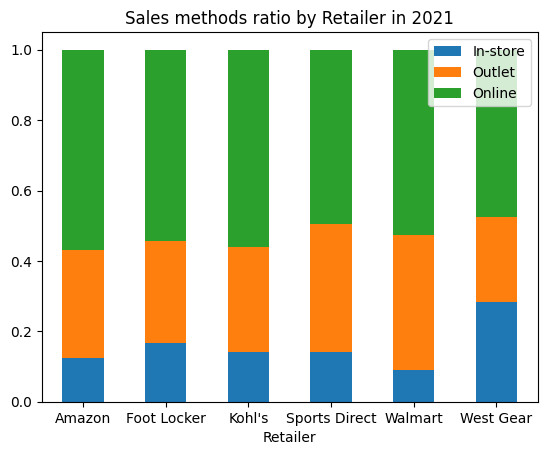

In [169]:
x20.plot(kind='bar',x='Retailer',stacked=True,rot=0,title="Sales methods ratio by Retailer in 2020")
x21.plot(kind='bar',x='Retailer',stacked=True,rot=0,title="Sales methods ratio by Retailer in 2021")
#plt.savefig('ratio20.png')
#plt.savefig('ratio21.png')

# 판매 방식별 매출

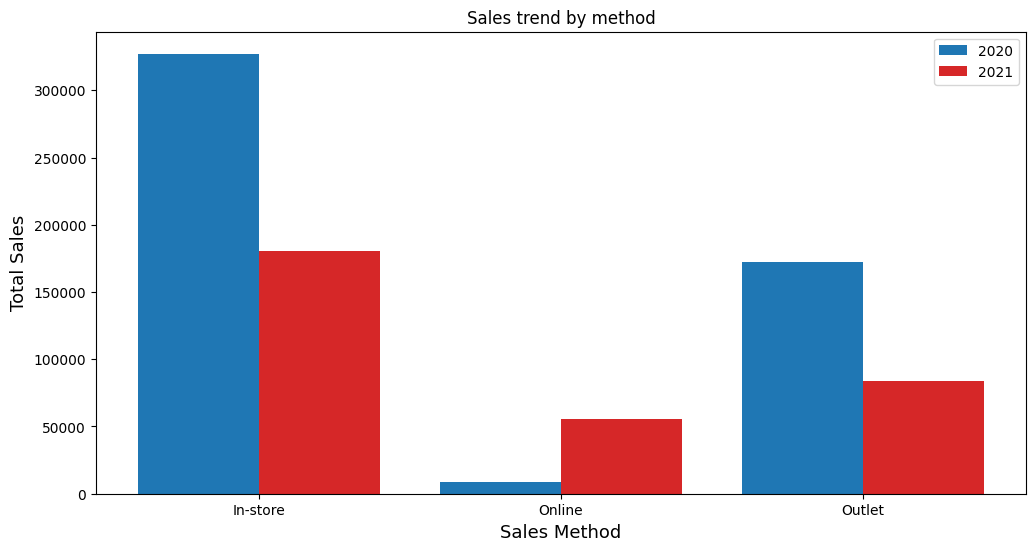

In [260]:

method2020=df[filter1].groupby('Sales Method')['Total Sales'].mean()
method2021=df[filter2].groupby('Sales Method')['Total Sales'].mean()
# 그림 사이즈, 바 굵기 조정
fig, ax = plt.subplots(figsize=(12,6))
bar_width = 0.4

# 판매 방식이 3개이므로 0, 1, 2 위치를 기준으로 삼음
index = np.arange(3)
method = method2020.index
# 각 연도별로 3개 샵의 bar를 순서대로 나타내는 과정, 각 그래프는 0.25의 간격을 두고 그려짐
b1 = plt.bar(index, method2020, bar_width, color=color[0], label='2020')

b2 = plt.bar(index + bar_width, method2021, bar_width, color=color[3], label='2021')

# x축 위치를 정 가운데로 조정하고 x축의 텍스트를 method 정보와 매칭
plt.xticks(np.arange(bar_width/2, 3+bar_width/2), method)
plt.title("Sales trend by method")
# x축, y축 이름 및 범례 설정
plt.xlabel('Sales Method', size = 13)
plt.ylabel('Total Sales', size = 13)
plt.legend()
plt.savefig('./trend.png')